In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
# Membaca file
file_path = 'tourism_with_id.csv'
data = pd.read_csv(file_path)

# **Data Understading dan Preparation**

In [ ]:
#Sekilas Dataset
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head()

Shape Of The Dataset : (437, 13)

Glimpse Of The Dataset :


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
# Cek Null Values
print(f"Null values of the Dataset :")
data.isna().sum().to_frame()

Null values of the Dataset :


,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [ ]:
#mengisi null values Time_Minutes
data['Time_Minutes'] = data['Time_Minutes'].fillna(data['Time_Minutes'].mean())

#drop Unnamed Collom 11 and 12
data_cleaned = data.drop(columns=['Unnamed: 11', 'Unnamed: 12'])

print(f"Null values of the Dataset :")
data_cleaned.isna().sum().to_frame()

Null values of the Dataset :


,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,0
Coordinate,0
Lat,0


In [ ]:
data_cleaned.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.000000,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.000000,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.000000,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,82.609756,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.000000,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  437 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


# **VISUALISASI DATA**

<ipython-input-10-1ac140a675fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='Category', palette='viridis')


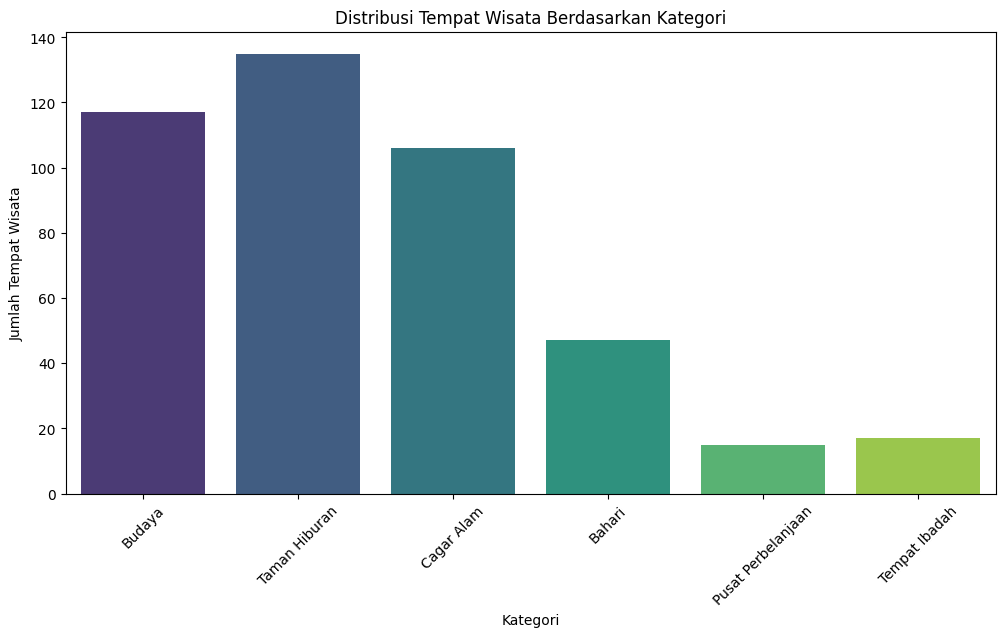

In [ ]:
# Bar Plot untuk Kategori Tempat Wisata
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='Category', palette='viridis')
plt.title('Distribusi Tempat Wisata Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Tempat Wisata')
plt.xticks(rotation=45)
plt.show()

**PENJELASAN**


1.   Sumbu X mewakili kategori dari tempat wisata. Dalam visualisasi ini, terdapat beberapa kategori yaitu "Budaya", "Taman Hiburan", "Cagar Alam", "Bahari", "Pusat Perbelanjaan", dan "Tempat Ibadah".
2.   Sumbu Y mewakili jumlah tempat wisata dalam setiap kategori. Angka-angka di sumbu Y menunjukkan berapa banyak tempat wisata yang termasuk dalam setiap kategori.
3.   Budaya: Memiliki sekitar hampir 120 tempat wisata.
4.   Taman Hiburan: Memiliki jumlah tempat wisata tertinggi di antara kategori lainnya, sekitar antara 130-140.
5.   Cagar Alam: Memiliki sekitar antara 100-120 tempat wisata.
6.   Bahari: Memiliki jumlah tempat wisata yang lebih sedikit, sekitar antara 40-60.
7.   Pusat Perbelanjaan: Memiliki jumlah tempat wisata yang paling sedikit, di bawah 20.
8.   Tempat Ibadah: Memiliki jumlah tempat wisata yang sedikit lebih banyak dibandingkan Pusat Perbelanjaan, sekitar 20.

**KESIMPULAN**


*   Kategori "Taman Hiburan" adalah yang paling banyak jumlah tempat wisatanya dalam dataset ini.
*   Kategori "Budaya" dan "Cagar Alam" juga memiliki jumlah tempat wisata yang signifikan.
*   Kategori "Pusat Perbelanjaan" dan "Tempat Ibadah" memiliki jumlah tempat wisata yang paling sedikit.




<ipython-input-11-7eeca74fad70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='City', y='Rating', palette='viridis')


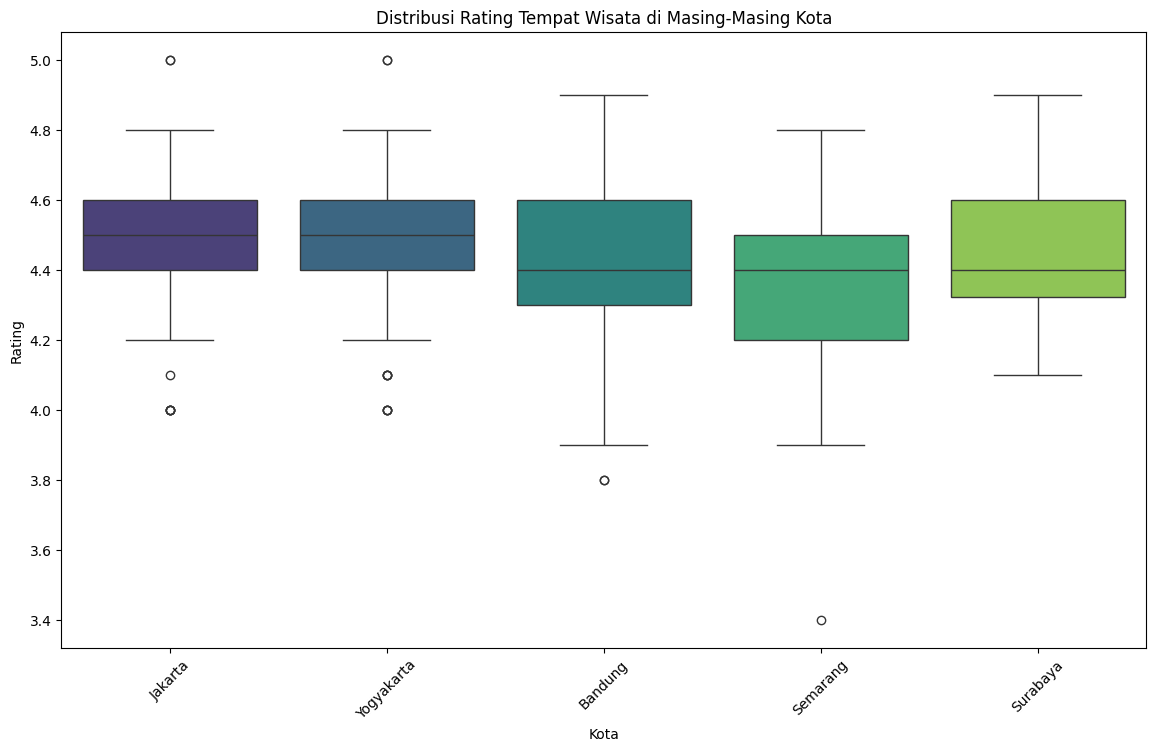

In [ ]:
# Membuat Box Plot untuk Rating Tempat Wisata di Masing-Masing Kota
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_cleaned, x='City', y='Rating', palette='viridis')
plt.title('Distribusi Rating Tempat Wisata di Masing-Masing Kota')
plt.xlabel('Kota')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

**PENJELASAN**


1.   Sumbu X menunjukkan nama-nama kota tempat wisata berada, yaitu Jakarta, Yogyakarta, Bandung, Semarang, dan Surabaya.
2.   Sumbu Y menunjukkan nilai rating tempat wisata. Rating ini menunjukkan seberapa baik tempat wisata tersebut berdasarkan ulasan atau penilaian dari pengunjung.
3.   Jakarta:

    Median rating sekitar 4.5.
    Sebagian besar rating berkisar antara 4.2 hingga 4.7.
    Terdapat beberapa outliers dengan rating di bawah 4.0.
4.   Yogyakarta:

    Median rating sekitar 4.5.
    Sebagian besar rating berkisar antara 4.3 hingga 4.8.
    Ada beberapa outliers dengan rating di bawah 4.0.
5.  Bandung:

    Median rating sekitar 4.4.
    Sebagian besar rating berkisar antara 4.2 hingga 4.8.
    Terdapat beberapa outliers dengan rating di bawah 3.8.
6.  Semarang:

    Median rating sekitar 4.3.
    Sebagian besar rating berkisar antara 4.1 hingga 4.7.
    Ada beberapa outliers dengan rating di bawah 3.8.
7.  Surabaya:

    Median rating sekitar 4.4.
    Sebagian besar rating berkisar antara 4.2 hingga 4.8.
    Ada beberapa outliers dengan rating di bawah 4.0.

**KESIMPULAN**


*   Median Rating: Secara umum, median rating tempat wisata di semua kota berada di sekitar 4.4 hingga 4.5, menunjukkan bahwa sebagian besar tempat wisata memiliki rating yang baik.
*   Variabilitas Rating: Lebar kotak dan panjang whiskers menunjukkan bahwa ada variabilitas dalam rating tempat wisata di setiap kota. Kota dengan kotak yang lebih sempit menunjukkan bahwa rating lebih konsisten, sementara kotak yang lebih lebar menunjukkan variasi yang lebih besar.
*   Outliers: Beberapa kota memiliki outliers yang menunjukkan tempat wisata dengan rating yang jauh lebih rendah dibandingkan dengan mayoritas tempat wisata di kota tersebut. Hal ini bisa menjadi indikasi adanya tempat wisata yang kurang populer atau memiliki masalah.





# **DBSCAN**

In [ ]:
# Menghapus kolom yang tidak diperlukan
# data = data_cleaned.drop(columns=['Place_Id', 'Description', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'])
data = data_cleaned.drop(columns=['Place_Id', 'Description', 'Coordinate'])

#Sekilas Dataset
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head()

Shape Of The Dataset : (437, 8)

Glimpse Of The Dataset :


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long
0,Monumen Nasional,Budaya,Jakarta,20000,4.6,15.000000,-6.175392,106.827153
1,Kota Tua,Budaya,Jakarta,0,4.6,90.000000,-6.137645,106.817125
2,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6,360.000000,-6.125312,106.833538
3,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5,82.609756,-6.302446,106.895156
4,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,4.5,60.000000,-6.124190,106.839134


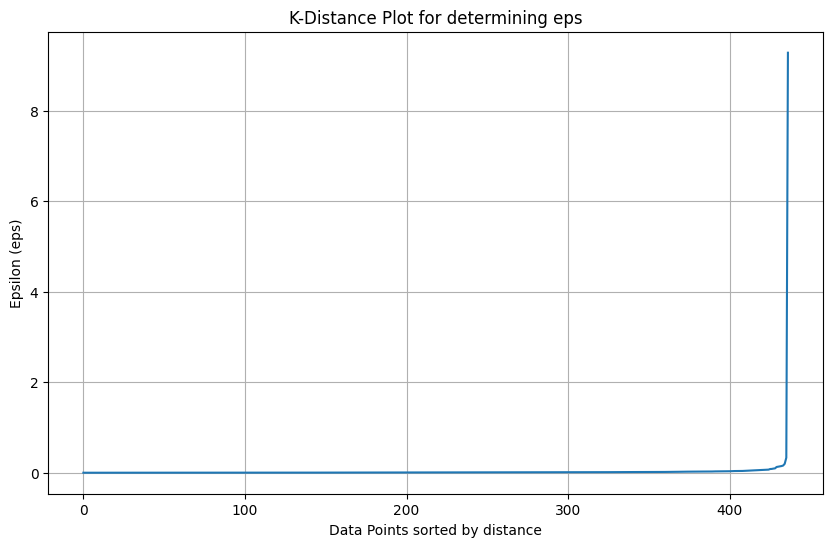

In [ ]:
from sklearn.neighbors import NearestNeighbors

data_cluster = data.copy()

features = data_cluster[['Lat', 'Long']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Menghitung K-Neighbors
k =
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(features_scaled)
distances, indices = neighbors_fit.kneighbors(features_scaled)

# Mengurutkan jarak ke k-tetangga terdekat
distances = np.sort(distances[:, k-1], axis=0)

# Membuat K-Distance plot
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon (eps)')
plt.title('K-Distance Plot for determining eps')
plt.grid()

In [ ]:
data_cluster = data.copy()

# Menyiapkan data untuk clustering
X = data_cluster[['Lat', 'Long']]  # Ganti dengan data Anda

# Rentang nilai eps dan min_samples untuk dicoba
eps_range = np.arange(0.1, 1.1, 0.1)
min_samples_range = range(2, 11)

best_score = -1
best_eps = None
best_min_samples = None
best_labels = None

for eps in eps_range:
    # print('ini')
    for min_samples in min_samples_range:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = db.labels_

        # Hanya hitung silhouette score jika lebih dari satu cluster terbentuk
        if len(set(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
            print(f'eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score}')

            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}')

eps: 0.1, min_samples: 2, Silhouette Score: 0.6633630838127997
eps: 0.1, min_samples: 3, Silhouette Score: 0.6633630838127997
eps: 0.1, min_samples: 4, Silhouette Score: 0.7184006458502664
eps: 0.1, min_samples: 5, Silhouette Score: 0.7184006458502664
eps: 0.1, min_samples: 6, Silhouette Score: 0.7157222488393523
eps: 0.1, min_samples: 7, Silhouette Score: 0.7157222488393523
eps: 0.1, min_samples: 8, Silhouette Score: 0.7157222488393523
eps: 0.1, min_samples: 9, Silhouette Score: 0.7157222488393523
eps: 0.1, min_samples: 10, Silhouette Score: 0.7135864816487133
eps: 0.2, min_samples: 2, Silhouette Score: 0.8146068998671803
eps: 0.2, min_samples: 3, Silhouette Score: 0.8146068998671803
eps: 0.2, min_samples: 4, Silhouette Score: 0.8063277866059163
eps: 0.2, min_samples: 5, Silhouette Score: 0.8065495853820507
eps: 0.2, min_samples: 6, Silhouette Score: 0.8065495853820507
eps: 0.2, min_samples: 7, Silhouette Score: 0.8065495853820507
eps: 0.2, min_samples: 8, Silhouette Score: 0.80654958

In [ ]:
# Merubah City menjadi numerik memasukannya ke data_cluster
data_cluster = data.copy()
# label_encoder = LabelEncoder()
# data_cluster['City'] = label_encoder.fit_transform(data['City'])

# Menyiapkan data untuk clustering
X = data_cluster[['Lat', 'Long']]
# X = data_cluster[['City']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Melakukan clustering dengan DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=2, metric='euclidean')
clusters = dbscan.fit_predict(X_scaled)
# clusters = dbscan.fit_predict(X)

# # Add the cluster labels to the original data and data_cluster
data['Cluster'] = clusters
data_cluster['Cluster'] = clusters


# # Menampilkan hasil clustering
print("Hasil Clustering:")
print(data_cluster['Cluster'].value_counts())

# #Sekilas Dataset
print(f"Shape Of The Dataset : {data_cluster.shape}")
print(f"\nSekilas Dataset :")
data_cluster.head(10)

Hasil Clustering:
Cluster
 1    126
 2    123
 0     83
 3     57
 4     46
-1      2
Name: count, dtype: int64
Shape Of The Dataset : (437, 9)

Sekilas Dataset :


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
0,Monumen Nasional,Budaya,Jakarta,20000,4.6,15.000000,-6.175392,106.827153,0
1,Kota Tua,Budaya,Jakarta,0,4.6,90.000000,-6.137645,106.817125,0
2,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6,360.000000,-6.125312,106.833538,0
3,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5,82.609756,-6.302446,106.895156,0
4,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,4.5,60.000000,-6.124190,106.839134,0
5,Taman Impian Jaya Ancol,Taman Hiburan,Jakarta,25000,4.5,10.000000,-6.117333,106.857995,0
6,Kebun Binatang Ragunan,Cagar Alam,Jakarta,4000,4.5,82.609756,-6.312459,106.820187,0
7,Ocean Ecopark,Taman Hiburan,Jakarta,180000,4.0,82.609756,-6.125802,106.836325,0
8,Pelabuhan Marina,Bahari,Jakarta,175000,4.4,82.609756,1.078880,103.931398,-1
9,Pulau Tidung,Bahari,Jakarta,150000,4.5,82.609756,-5.803205,106.523791,0


In [ ]:
# Evaluasi hasil clustering menggunakan Silhouette Score, davies_bouldin_score, calinski_harabasz_score
silhouette = silhouette_score(X_scaled, clusters)
davies = davies_bouldin_score(X_scaled, clusters)
calinski = calinski_harabasz_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette}')
print(f'Davies-Bouldin Index: {davies}')
print(f'Calinski-Harabasz Index: {calinski}')

Silhouette Score: 0.8146068998671803
Davies-Bouldin Index: 0.9226943033973152
Calinski-Harabasz Index: 962.647253796573


In [ ]:
# Menampilkan data untuk setiap cluster
clusters = data['Cluster'].unique()

for cluster in clusters:
    print(f"Cluster {cluster}")
    all_cluster_data = data[data['Cluster'] == cluster]
    display(all_cluster_data.head(10))
    print("\n")

Cluster 0


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
0,Monumen Nasional,Budaya,Jakarta,20000,4.6,15.000000,-6.175392,106.827153,0
1,Kota Tua,Budaya,Jakarta,0,4.6,90.000000,-6.137645,106.817125,0
2,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6,360.000000,-6.125312,106.833538,0
3,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5,82.609756,-6.302446,106.895156,0
4,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,4.5,60.000000,-6.124190,106.839134,0
5,Taman Impian Jaya Ancol,Taman Hiburan,Jakarta,25000,4.5,10.000000,-6.117333,106.857995,0
6,Kebun Binatang Ragunan,Cagar Alam,Jakarta,4000,4.5,82.609756,-6.312459,106.820187,0
7,Ocean Ecopark,Taman Hiburan,Jakarta,180000,4.0,82.609756,-6.125802,106.836325,0
9,Pulau Tidung,Bahari,Jakarta,150000,4.5,82.609756,-5.803205,106.523791,0
10,Pulau Bidadari,Bahari,Jakarta,5000,4.6,82.609756,-6.035833,106.746944,0




Cluster -1


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
8,Pelabuhan Marina,Bahari,Jakarta,175000,4.4,82.609756,1.078880,103.931398,-1
322,Kebun Tanaman Obat Sari Alam,Cagar Alam,Bandung,0,4.9,90.000000,-6.601321,106.632734,-1




Cluster 1


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
84,Taman Pintar Yogyakarta,Taman Hiburan,Yogyakarta,6000,4.5,120.000000,-7.800671,110.367655,1
85,Keraton Yogyakarta,Budaya,Yogyakarta,15000,4.6,82.609756,-7.805284,110.364203,1
86,Sindu Kusuma Edupark (SKE),Taman Hiburan,Yogyakarta,20000,4.2,120.000000,-7.767297,110.354249,1
87,Museum Benteng Vredeburg Yogyakarta,Budaya,Yogyakarta,3000,4.6,120.000000,-7.800202,110.366304,1
88,De Mata Museum Jogja,Budaya,Yogyakarta,50000,4.4,82.609756,-7.816316,110.387144,1
89,Kampung Wisata Taman Sari,Taman Hiburan,Yogyakarta,5000,4.6,82.609756,-7.810067,110.359458,1
90,Situs Warungboto,Taman Hiburan,Yogyakarta,0,4.4,60.000000,-7.810269,110.393151,1
91,Nol Kilometer Jl.Malioboro,Taman Hiburan,Yogyakarta,0,4.7,45.000000,-7.801380,110.364765,1
92,Gembira Loka Zoo,Cagar Alam,Yogyakarta,60000,4.5,82.609756,-7.806234,110.396798,1
93,Sumur Gumuling,Taman Hiburan,Yogyakarta,7000,4.5,82.609756,-7.808791,110.359183,1




Cluster 2


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
210,GunungTangkuban perahu,Cagar Alam,Bandung,30000,4.5,82.609756,-6.759638,107.609781,2
211,Jalan Braga,Budaya,Bandung,0,4.7,82.609756,-6.915053,107.608984,2
212,Gedung Sate,Budaya,Bandung,5000,4.6,82.609756,-6.902481,107.618810,2
213,Trans Studio Bandung,Taman Hiburan,Bandung,280000,4.5,240.000000,-6.925094,107.636494,2
214,Taman Hutan Raya Ir. H. Djuanda,Cagar Alam,Bandung,15000,4.5,90.000000,-6.856579,107.632373,2
215,Farm House Susu Lembang,Taman Hiburan,Bandung,30000,4.4,82.609756,-6.832969,107.605618,2
216,Kebun Binatang Bandung,Cagar Alam,Bandung,20000,4.0,180.000000,-6.889718,107.607728,2
217,Kawah Putih,Cagar Alam,Bandung,81000,4.5,82.609756,-7.166204,107.402126,2
218,Tebing Karaton,Cagar Alam,Bandung,15000,4.5,82.609756,-6.834068,107.663615,2
219,Dusun Bambu,Taman Hiburan,Bandung,25000,4.5,82.609756,-6.789715,107.579163,2




Cluster 3


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
334,Candi Gedong Songo,Budaya,Semarang,10000,4.5,82.609756,-7.209887,110.342112,3
335,Grand Maerakaca,Taman Hiburan,Semarang,15000,4.4,82.609756,-6.960522,110.386394,3
336,Kampung Pelangi,Taman Hiburan,Semarang,3000,4.3,30.000000,-6.988881,110.408378,3
337,Lawang Sewu,Budaya,Semarang,10000,4.6,82.609756,-6.983910,110.410434,3
338,Sam Poo Kong Temple,Budaya,Semarang,35000,4.5,82.609756,-6.996237,110.398122,3
339,Desa Wisata Lembah Kalipancur,Taman Hiburan,Semarang,0,3.9,90.000000,-7.020524,110.375461,3
340,Hutan Wisata Tinjomoyo Semarang,Cagar Alam,Semarang,3000,4.3,82.609756,-7.029684,110.399961,3
341,Taman Kasmaran,Taman Hiburan,Semarang,3000,4.5,90.000000,-6.990940,110.406593,3
342,Pantai Baruna,Bahari,Semarang,3000,4.0,82.609756,-6.945105,110.398240,3
343,Pantai Marina,Bahari,Semarang,3000,4.1,82.609756,-6.948877,110.389329,3




Cluster 4


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
391,Ekowisata Mangrove Wonorejo,Cagar Alam,Surabaya,0,4.3,60.000000,-7.308648,112.821662,4
392,Taman Harmoni Keputih,Cagar Alam,Surabaya,0,4.4,60.000000,-7.295221,112.803560,4
393,Air Mancur Menari,Taman Hiburan,Surabaya,35000,4.4,45.000000,-7.235693,112.795523,4
394,Taman Prestasi,Taman Hiburan,Surabaya,0,4.6,82.609756,-7.261472,112.742828,4
395,Monumen Kapal Selam,Budaya,Surabaya,15000,4.4,30.000000,-7.265430,112.750305,4
396,Taman Kunang-Kunang,Taman Hiburan,Surabaya,0,4.4,45.000000,-7.318220,112.784240,4
397,Taman Buah Surabaya,Taman Hiburan,Surabaya,0,4.1,30.000000,-7.266214,112.795281,4
398,Taman Pelangi,Taman Hiburan,Surabaya,0,4.5,20.000000,-7.327560,112.731224,4
399,Hutan Bambu Keputih,Cagar Alam,Surabaya,0,4.3,25.000000,-7.294191,112.801724,4
400,Taman Keputran,Taman Hiburan,Surabaya,0,4.3,82.609756,-7.273215,112.744102,4


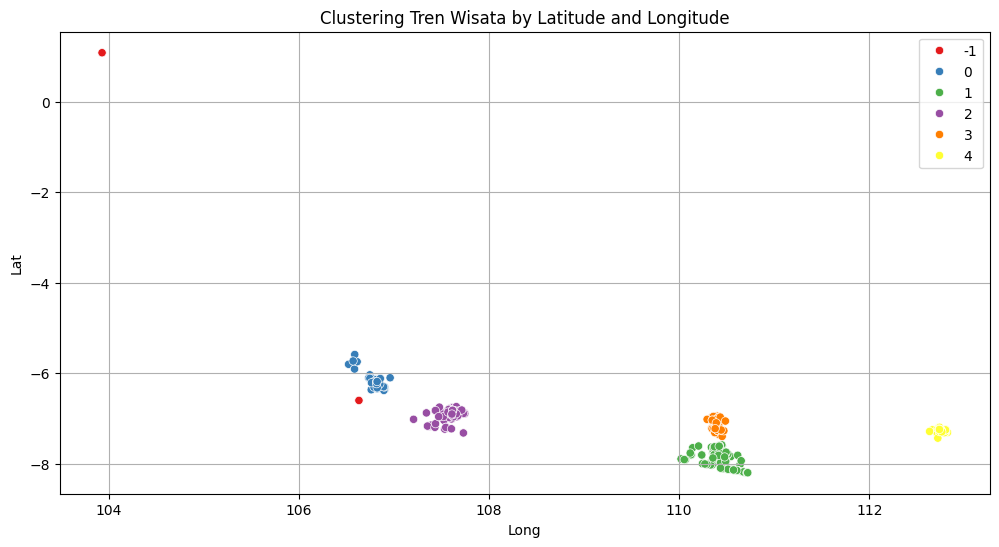

In [ ]:
# Visualisasi hasil clustering
import matplotlib.pyplot as plt
import seaborn as sns

# # price dan rating
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x='Price', y='Rating', hue='Cluster', data=data, palette='Set1')
# plt.title('Clustering Tren Wisata with DBSCAN')
# plt.xlabel('Price')
# plt.ylabel('Rating')
# plt.legend()
# plt.grid()

# lat dan long
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Long', y='Lat', hue='Cluster', data=data, palette='Set1')
plt.title('Clustering Tren Wisata by Latitude and Longitude')
plt.xlabel('Long')
plt.ylabel('Lat')
plt.legend()
plt.grid()

# **MENANGANI OUTLIERS**

In [ ]:
# Identifikasi data noise (Cluster -1)
noise = data[data['Cluster'] == -1]

# Menghitung rata-rata koordinat dan cluster yang paling sering muncul untuk setiap kota
for city in noise['City'].unique():
    mean_lat = data[(data['City'] == city) & (data['Cluster'] != -1)]['Lat'].mean()
    mean_long = data[(data['City'] == city) & (data['Cluster'] != -1)]['Long'].mean()
    # mode_cluster = data[data['City'] == city]['Cluster']

    # Memperbarui data noise dengan nilai rata-rata koordinat dan cluster yang sesuai
    data.loc[(data['City'] == city) & (data['Cluster'] == -1), 'Lat'] = mean_lat
    data.loc[(data['City'] == city) & (data['Cluster'] == -1), 'Long'] = mean_long
    # data.loc[(data['City'] == city) & (data['Cluster'] == -1), 'Cluster'] = mode_cluster

#Pastikan tidak ada cluster -1 lagi
# data = data[data['Cluster'] != -1]

# Menampilkan hasil clustering
print("Hasil Clustering:")
print(data['Cluster'].value_counts())

# Sekilas Dataset
print(f"\nSekilas Dataset :")
new_noice = data[data['Cluster'] == -1]
new_noice

Hasil Clustering:
Cluster
 1    126
 2    123
 0     83
 3     57
 4     46
-1      2
Name: count, dtype: int64

Sekilas Dataset :


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
8,Pelabuhan Marina,Bahari,Jakarta,175000,4.4,82.609756,-6.171912,106.811846,-1
322,Kebun Tanaman Obat Sari Alam,Cagar Alam,Bandung,0,4.9,90.000000,-6.907929,107.594165,-1


In [ ]:
data_cluster = data.copy()

# Menyiapkan data untuk clustering
X = data_cluster[['Lat', 'Long']]  # Ganti dengan data Anda

# Rentang nilai eps dan min_samples untuk dicoba
eps_range = np.arange(0.1, 1.1, 0.1)
min_samples_range = range(2, 11)

best_score = -1
best_eps = None
best_min_samples = None
best_labels = None

for eps in eps_range:
    # print('ini')
    for min_samples in min_samples_range:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = db.labels_

        # Hanya hitung silhouette score jika lebih dari satu cluster terbentuk
        if len(set(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
            print(f'eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score}')

            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}')

eps: 0.1, min_samples: 2, Silhouette Score: 0.6562170384724043
eps: 0.1, min_samples: 3, Silhouette Score: 0.6614522655835844
eps: 0.1, min_samples: 4, Silhouette Score: 0.7232728251572161
eps: 0.1, min_samples: 5, Silhouette Score: 0.7232728251572161
eps: 0.1, min_samples: 6, Silhouette Score: 0.7205638069975726
eps: 0.1, min_samples: 7, Silhouette Score: 0.7205638069975726
eps: 0.1, min_samples: 8, Silhouette Score: 0.7071171082561281
eps: 0.1, min_samples: 9, Silhouette Score: 0.7063113468233859
eps: 0.1, min_samples: 10, Silhouette Score: 0.6946648921519903
eps: 0.2, min_samples: 2, Silhouette Score: 0.8050892375946419
eps: 0.2, min_samples: 3, Silhouette Score: 0.8050892375946419
eps: 0.2, min_samples: 4, Silhouette Score: 0.8050892375946419
eps: 0.2, min_samples: 5, Silhouette Score: 0.8114111498050869
eps: 0.2, min_samples: 6, Silhouette Score: 0.8114111498050869
eps: 0.2, min_samples: 7, Silhouette Score: 0.8114111498050869
eps: 0.2, min_samples: 8, Silhouette Score: 0.81141114

In [ ]:
# Menyiapkan data untuk clustering
X = data_cluster[['Lat', 'Long']]
# X = data_cluster[['City']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Melakukan clustering dengan DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2, metric='euclidean')
clusters = dbscan.fit_predict(X_scaled)
# clusters = dbscan.fit_predict(X)

# # Add the cluster labels to the original data and data_cluster
data['Cluster'] = clusters
data_cluster['Cluster'] = clusters


# # Menampilkan hasil clustering
print("Hasil Clustering:")
print(data_cluster['Cluster'].value_counts())

# #Sekilas Dataset
print(f"Shape Of The Dataset : {data_cluster.shape}")
print(f"\nSekilas Dataset :")
data_cluster.head(10)

Hasil Clustering:
Cluster
1    126
2    124
0     84
3     57
4     46
Name: count, dtype: int64
Shape Of The Dataset : (437, 9)

Sekilas Dataset :


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
0,Monumen Nasional,Budaya,Jakarta,20000,4.6,15.000000,-6.175392,106.827153,0
1,Kota Tua,Budaya,Jakarta,0,4.6,90.000000,-6.137645,106.817125,0
2,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6,360.000000,-6.125312,106.833538,0
3,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5,82.609756,-6.302446,106.895156,0
4,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,4.5,60.000000,-6.124190,106.839134,0
5,Taman Impian Jaya Ancol,Taman Hiburan,Jakarta,25000,4.5,10.000000,-6.117333,106.857995,0
6,Kebun Binatang Ragunan,Cagar Alam,Jakarta,4000,4.5,82.609756,-6.312459,106.820187,0
7,Ocean Ecopark,Taman Hiburan,Jakarta,180000,4.0,82.609756,-6.125802,106.836325,0
8,Pelabuhan Marina,Bahari,Jakarta,175000,4.4,82.609756,-6.171912,106.811846,0
9,Pulau Tidung,Bahari,Jakarta,150000,4.5,82.609756,-5.803205,106.523791,0


In [ ]:
# Evaluasi hasil clustering menggunakan Silhouette Score, davies_bouldin_score, calinski_harabasz_score
silhouette = silhouette_score(X_scaled, clusters)
davies = davies_bouldin_score(X_scaled, clusters)
calinski = calinski_harabasz_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette}')
print(f'Davies-Bouldin Index: {davies}')
print(f'Calinski-Harabasz Index: {calinski}')

Silhouette Score: 0.8192594408393277
Davies-Bouldin Index: 0.26022024810364497
Calinski-Harabasz Index: 4462.960269287572


In [ ]:
# Menampilkan data untuk setiap cluster
clusters = data['Cluster'].unique()

for cluster in clusters:
    print(f"Cluster {cluster}")
    all_cluster_data = data[data['Cluster'] == cluster]
    display(all_cluster_data.head(10))
    print("\n")

Cluster 0


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
0,Monumen Nasional,Budaya,Jakarta,20000,4.6,15.000000,-6.175392,106.827153,0
1,Kota Tua,Budaya,Jakarta,0,4.6,90.000000,-6.137645,106.817125,0
2,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6,360.000000,-6.125312,106.833538,0
3,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5,82.609756,-6.302446,106.895156,0
4,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,4.5,60.000000,-6.124190,106.839134,0
5,Taman Impian Jaya Ancol,Taman Hiburan,Jakarta,25000,4.5,10.000000,-6.117333,106.857995,0
6,Kebun Binatang Ragunan,Cagar Alam,Jakarta,4000,4.5,82.609756,-6.312459,106.820187,0
7,Ocean Ecopark,Taman Hiburan,Jakarta,180000,4.0,82.609756,-6.125802,106.836325,0
8,Pelabuhan Marina,Bahari,Jakarta,175000,4.4,82.609756,-6.171912,106.811846,0
9,Pulau Tidung,Bahari,Jakarta,150000,4.5,82.609756,-5.803205,106.523791,0




Cluster 1


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
84,Taman Pintar Yogyakarta,Taman Hiburan,Yogyakarta,6000,4.5,120.000000,-7.800671,110.367655,1
85,Keraton Yogyakarta,Budaya,Yogyakarta,15000,4.6,82.609756,-7.805284,110.364203,1
86,Sindu Kusuma Edupark (SKE),Taman Hiburan,Yogyakarta,20000,4.2,120.000000,-7.767297,110.354249,1
87,Museum Benteng Vredeburg Yogyakarta,Budaya,Yogyakarta,3000,4.6,120.000000,-7.800202,110.366304,1
88,De Mata Museum Jogja,Budaya,Yogyakarta,50000,4.4,82.609756,-7.816316,110.387144,1
89,Kampung Wisata Taman Sari,Taman Hiburan,Yogyakarta,5000,4.6,82.609756,-7.810067,110.359458,1
90,Situs Warungboto,Taman Hiburan,Yogyakarta,0,4.4,60.000000,-7.810269,110.393151,1
91,Nol Kilometer Jl.Malioboro,Taman Hiburan,Yogyakarta,0,4.7,45.000000,-7.801380,110.364765,1
92,Gembira Loka Zoo,Cagar Alam,Yogyakarta,60000,4.5,82.609756,-7.806234,110.396798,1
93,Sumur Gumuling,Taman Hiburan,Yogyakarta,7000,4.5,82.609756,-7.808791,110.359183,1




Cluster 2


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
210,GunungTangkuban perahu,Cagar Alam,Bandung,30000,4.5,82.609756,-6.759638,107.609781,2
211,Jalan Braga,Budaya,Bandung,0,4.7,82.609756,-6.915053,107.608984,2
212,Gedung Sate,Budaya,Bandung,5000,4.6,82.609756,-6.902481,107.618810,2
213,Trans Studio Bandung,Taman Hiburan,Bandung,280000,4.5,240.000000,-6.925094,107.636494,2
214,Taman Hutan Raya Ir. H. Djuanda,Cagar Alam,Bandung,15000,4.5,90.000000,-6.856579,107.632373,2
215,Farm House Susu Lembang,Taman Hiburan,Bandung,30000,4.4,82.609756,-6.832969,107.605618,2
216,Kebun Binatang Bandung,Cagar Alam,Bandung,20000,4.0,180.000000,-6.889718,107.607728,2
217,Kawah Putih,Cagar Alam,Bandung,81000,4.5,82.609756,-7.166204,107.402126,2
218,Tebing Karaton,Cagar Alam,Bandung,15000,4.5,82.609756,-6.834068,107.663615,2
219,Dusun Bambu,Taman Hiburan,Bandung,25000,4.5,82.609756,-6.789715,107.579163,2




Cluster 3


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
334,Candi Gedong Songo,Budaya,Semarang,10000,4.5,82.609756,-7.209887,110.342112,3
335,Grand Maerakaca,Taman Hiburan,Semarang,15000,4.4,82.609756,-6.960522,110.386394,3
336,Kampung Pelangi,Taman Hiburan,Semarang,3000,4.3,30.000000,-6.988881,110.408378,3
337,Lawang Sewu,Budaya,Semarang,10000,4.6,82.609756,-6.983910,110.410434,3
338,Sam Poo Kong Temple,Budaya,Semarang,35000,4.5,82.609756,-6.996237,110.398122,3
339,Desa Wisata Lembah Kalipancur,Taman Hiburan,Semarang,0,3.9,90.000000,-7.020524,110.375461,3
340,Hutan Wisata Tinjomoyo Semarang,Cagar Alam,Semarang,3000,4.3,82.609756,-7.029684,110.399961,3
341,Taman Kasmaran,Taman Hiburan,Semarang,3000,4.5,90.000000,-6.990940,110.406593,3
342,Pantai Baruna,Bahari,Semarang,3000,4.0,82.609756,-6.945105,110.398240,3
343,Pantai Marina,Bahari,Semarang,3000,4.1,82.609756,-6.948877,110.389329,3




Cluster 4


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
391,Ekowisata Mangrove Wonorejo,Cagar Alam,Surabaya,0,4.3,60.000000,-7.308648,112.821662,4
392,Taman Harmoni Keputih,Cagar Alam,Surabaya,0,4.4,60.000000,-7.295221,112.803560,4
393,Air Mancur Menari,Taman Hiburan,Surabaya,35000,4.4,45.000000,-7.235693,112.795523,4
394,Taman Prestasi,Taman Hiburan,Surabaya,0,4.6,82.609756,-7.261472,112.742828,4
395,Monumen Kapal Selam,Budaya,Surabaya,15000,4.4,30.000000,-7.265430,112.750305,4
396,Taman Kunang-Kunang,Taman Hiburan,Surabaya,0,4.4,45.000000,-7.318220,112.784240,4
397,Taman Buah Surabaya,Taman Hiburan,Surabaya,0,4.1,30.000000,-7.266214,112.795281,4
398,Taman Pelangi,Taman Hiburan,Surabaya,0,4.5,20.000000,-7.327560,112.731224,4
399,Hutan Bambu Keputih,Cagar Alam,Surabaya,0,4.3,25.000000,-7.294191,112.801724,4
400,Taman Keputran,Taman Hiburan,Surabaya,0,4.3,82.609756,-7.273215,112.744102,4


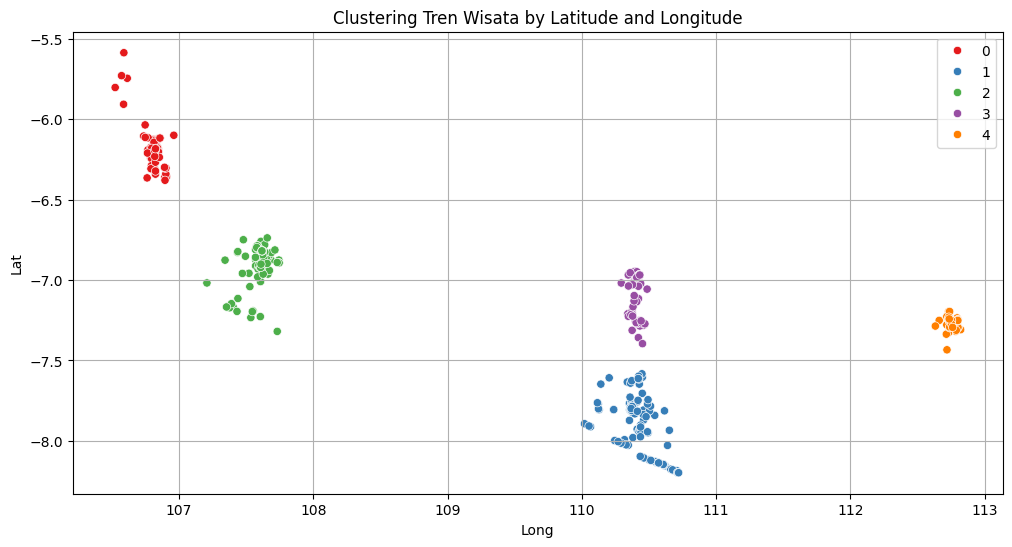

In [ ]:
# Visualisasi hasil clustering
import matplotlib.pyplot as plt
import seaborn as sns

# # price dan rating
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x='Price', y='Rating', hue='Cluster', data=data, palette='Set1')
# plt.title('Clustering Tren Wisata with DBSCAN')
# plt.xlabel('Price')
# plt.ylabel('Rating')
# plt.legend()
# plt.grid()

# lat dan long
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Long', y='Lat', hue='Cluster', data=data, palette='Set1')
plt.title('Clustering Tren Wisata by Latitude and Longitude')
plt.xlabel('Long')
plt.ylabel('Lat')
plt.legend()
plt.grid()

# **ANALISIS TREN**

In [ ]:
# Menambahkan colom Cluster di data_cluster ke data
data_cleaned['Cluster'] = data['Cluster']
data_recomendation = data_cleaned.copy()

# Menentukan Top 5 tempat wisata berdasarkan rating di setiap cluster
top_5_places = data_recomendation.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Rating')).reset_index(drop=True)

# Visualisasi Top 5 tempat wisata di setiap cluster
print("Top 5 Tempat Wisata yang sedan Tren untuk setiap cluster")
for cluster in top_5_places['Cluster'].unique():
    if cluster == -1:
        continue
    print(f"\nTop 5 Tempat Wisata yang sedan Tren di Cluster {cluster}:")
    display(top_5_places[top_5_places['Cluster'] == cluster][['Place_Name', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes']])

Top 5 Tempat Wisata yang sedan Tren untuk setiap cluster

Top 5 Tempat Wisata yang sedan Tren di Cluster 0:


,Place_Name,Category,City,Price,Rating,Time_Minutes
0,Wisata Kuliner Pecenongan,Pusat Perbelanjaan,Jakarta,0,5.0,82.609756
1,Freedom Library,Budaya,Jakarta,0,5.0,82.609756
2,Pulau Pelangi,Bahari,Jakarta,900000,4.8,82.609756
3,Gereja Katedral,Tempat Ibadah,Jakarta,0,4.8,82.609756
4,Galeri Indonesia Kaya,Budaya,Jakarta,0,4.8,90.000000



Top 5 Tempat Wisata yang sedan Tren di Cluster 1:


,Place_Name,Category,City,Price,Rating,Time_Minutes
5,Desa Wisata Sungai Code Jogja Kota,Taman Hiburan,Yogyakarta,0,5.0,82.609756
6,Kauman Pakualaman Yogyakarta,Budaya,Yogyakarta,0,5.0,82.609756
7,Kawasan Malioboro,Taman Hiburan,Yogyakarta,0,4.8,82.609756
8,Nol Kilometer Jl.Malioboro,Taman Hiburan,Yogyakarta,0,4.7,45.000000
9,Tugu Pal Putih Jogja,Taman Hiburan,Yogyakarta,0,4.7,15.000000



Top 5 Tempat Wisata yang sedan Tren di Cluster 2:


,Place_Name,Category,City,Price,Rating,Time_Minutes
10,Masjid Daarut Tauhiid Bandung,Tempat Ibadah,Bandung,0,4.9,82.609756
11,Gereja Tiberias Indonesia Bandung,Tempat Ibadah,Bandung,0,4.9,82.609756
12,Kebun Tanaman Obat Sari Alam,Cagar Alam,Bandung,0,4.9,90.000000
13,Gereja Katedral Santo Petrus Bandung,Tempat Ibadah,Bandung,0,4.8,82.609756
14,Masjid Agung Trans Studio Bandung,Tempat Ibadah,Bandung,0,4.8,82.609756



Top 5 Tempat Wisata yang sedan Tren di Cluster 3:


,Place_Name,Category,City,Price,Rating,Time_Minutes
15,Gua Maria Kerep Ambarawa,Cagar Alam,Semarang,2000,4.8,82.609756
16,Kampoeng Djadhoel Semarang,Budaya,Semarang,10000,4.7,82.609756
17,Pura Giri Natha,Budaya,Semarang,20000,4.7,82.609756
18,Taman Srigunting,Taman Hiburan,Semarang,0,4.7,82.609756
19,Kota Lama Semarang,Budaya,Semarang,0,4.7,90.000000



Top 5 Tempat Wisata yang sedan Tren di Cluster 4:


,Place_Name,Category,City,Price,Rating,Time_Minutes
20,Masjid Nasional Al-Akbar,Tempat Ibadah,Surabaya,0,4.9,82.609756
21,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Surabaya,10000,4.8,82.609756
22,Masjid Muhammad Cheng Hoo,Tempat Ibadah,Surabaya,0,4.7,82.609756
23,Museum Sepuluh Nopember Kota Surabaya,Budaya,Surabaya,5000,4.7,82.609756
24,Monumen Tugu Pahlawan,Budaya,Surabaya,0,4.7,30.000000


In [ ]:
# Analyze and summarize the results
summary = []
for cluster in top_5_places['Cluster'].unique():
    if cluster == -1:
        continue
    data_recomendation = top_5_places[top_5_places['Cluster'] == cluster]
    dominant_category = data_recomendation['Category'].mode()[0]
    dominant_city = data_recomendation['City'].mode()[0]
    price_range = (data_recomendation['Price'].min(), data_recomendation['Price'].max())
    duration_range = (data_recomendation['Time_Minutes'].min(), data_recomendation['Time_Minutes'].max())
    highest_rating = data_recomendation['Rating'].max()
    summary.append({
        'Cluster': cluster,
        'Dominant_Category': dominant_category,
        'City': dominant_city,
        'Place_Name': data_recomendation['Place_Na`me'].iloc[0],
        'Price_Range': price_range,
        'Highest_Rating': highest_rating,
        'Duration_Range': duration_range
    })

summary_df = pd.DataFrame(summary)
print("\nSummary of Clusters:")
display(summary_df)


Summary of Clusters:


,Cluster,Dominant_Category,City,Place_Name,Price_Range,Highest_Rating,Duration_Range
0,0,Budaya,Jakarta,Wisata Kuliner Pecenongan,"(0, 900000)",5.0,"(82.60975609756098, 90.0)"
1,1,Taman Hiburan,Yogyakarta,Desa Wisata Sungai Code Jogja Kota,"(0, 0)",5.0,"(15.0, 82.60975609756098)"
2,2,Tempat Ibadah,Bandung,Masjid Daarut Tauhiid Bandung,"(0, 0)",4.9,"(82.60975609756098, 90.0)"
3,3,Budaya,Semarang,Gua Maria Kerep Ambarawa,"(0, 20000)",4.8,"(82.60975609756098, 90.0)"
4,4,Tempat Ibadah,Surabaya,Masjid Nasional Al-Akbar,"(0, 10000)",4.9,"(30.0, 82.60975609756098)"


In [ ]:
# Kelompokkan data ringkasan berdasarkan cluster dan kota
grouped_summary = summary_df.groupby(['Cluster', 'City']).agg(
    Dominant_Category=('Dominant_Category', 'first'),
    Place_Name=('Place_Name', 'first'),
    Price_Range=('Price_Range', 'first'),
    Highest_Rating=('Highest_Rating', 'first'),
    Duration_Range=('Duration_Range', 'first')
)

# Cetak kesimpulan untuk setiap kombinasi cluster-kota
for cluster, city_data in grouped_summary.groupby('Cluster'):
    if cluster == -1:
        continue
    print(f"\n**Cluster {cluster}:**")
    for city, row in city_data.iterrows():
        print(f"\n- **City:** {city}")
        print(f"  - Dominant Category: {row['Dominant_Category']}")
        print(f"  - Place Name: {row['Place_Name']}")
        print(f"  - Price Range: {row['Price_Range']}")
        print(f"  - Highest Rating: {row['Highest_Rating']}")
        print(f"  - Duration Range: {row['Duration_Range']}")



**Cluster 0:**

- **City:** (0, 'Jakarta')
  - Dominant Category: Budaya
  - Place Name: Wisata Kuliner Pecenongan
  - Price Range: (0, 900000)
  - Highest Rating: 5.0
  - Duration Range: (82.60975609756098, 90.0)

**Cluster 1:**

- **City:** (1, 'Yogyakarta')
  - Dominant Category: Taman Hiburan
  - Place Name: Desa Wisata Sungai Code Jogja Kota
  - Price Range: (0, 0)
  - Highest Rating: 5.0
  - Duration Range: (15.0, 82.60975609756098)

**Cluster 2:**

- **City:** (2, 'Bandung')
  - Dominant Category: Tempat Ibadah
  - Place Name: Masjid Daarut Tauhiid Bandung
  - Price Range: (0, 0)
  - Highest Rating: 4.9
  - Duration Range: (82.60975609756098, 90.0)

**Cluster 3:**

- **City:** (3, 'Semarang')
  - Dominant Category: Budaya
  - Place Name: Gua Maria Kerep Ambarawa
  - Price Range: (0, 20000)
  - Highest Rating: 4.8
  - Duration Range: (82.60975609756098, 90.0)

**Cluster 4:**

- **City:** (4, 'Surabaya')
  - Dominant Category: Tempat Ibadah
  - Place Name: Masjid Nasional Al-Akba

# **ANALISIS TREN SETIAP CLUSTER**

## Tren Cluster 0

In [ ]:
# Mengambil data cluster 0 saja dari data ke data_cluster0
data_cluster0 = data[data['Cluster'] == 0]
cluster = data_cluster0['Cluster'].unique()[0]
city = data_cluster0['City'].unique()[0]
print('Tren Cluster '+ str(cluster) + " - " +  city)
data_cluster0.head(10)

Tren Cluster 0 - Jakarta


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
0,Monumen Nasional,Budaya,Jakarta,20000,4.6,15.000000,-6.175392,106.827153,0
1,Kota Tua,Budaya,Jakarta,0,4.6,90.000000,-6.137645,106.817125,0
2,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6,360.000000,-6.125312,106.833538,0
3,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5,82.609756,-6.302446,106.895156,0
4,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,4.5,60.000000,-6.124190,106.839134,0
5,Taman Impian Jaya Ancol,Taman Hiburan,Jakarta,25000,4.5,10.000000,-6.117333,106.857995,0
6,Kebun Binatang Ragunan,Cagar Alam,Jakarta,4000,4.5,82.609756,-6.312459,106.820187,0
7,Ocean Ecopark,Taman Hiburan,Jakarta,180000,4.0,82.609756,-6.125802,106.836325,0
8,Pelabuhan Marina,Bahari,Jakarta,175000,4.4,82.609756,-6.171912,106.811846,0
9,Pulau Tidung,Bahari,Jakarta,150000,4.5,82.609756,-5.803205,106.523791,0


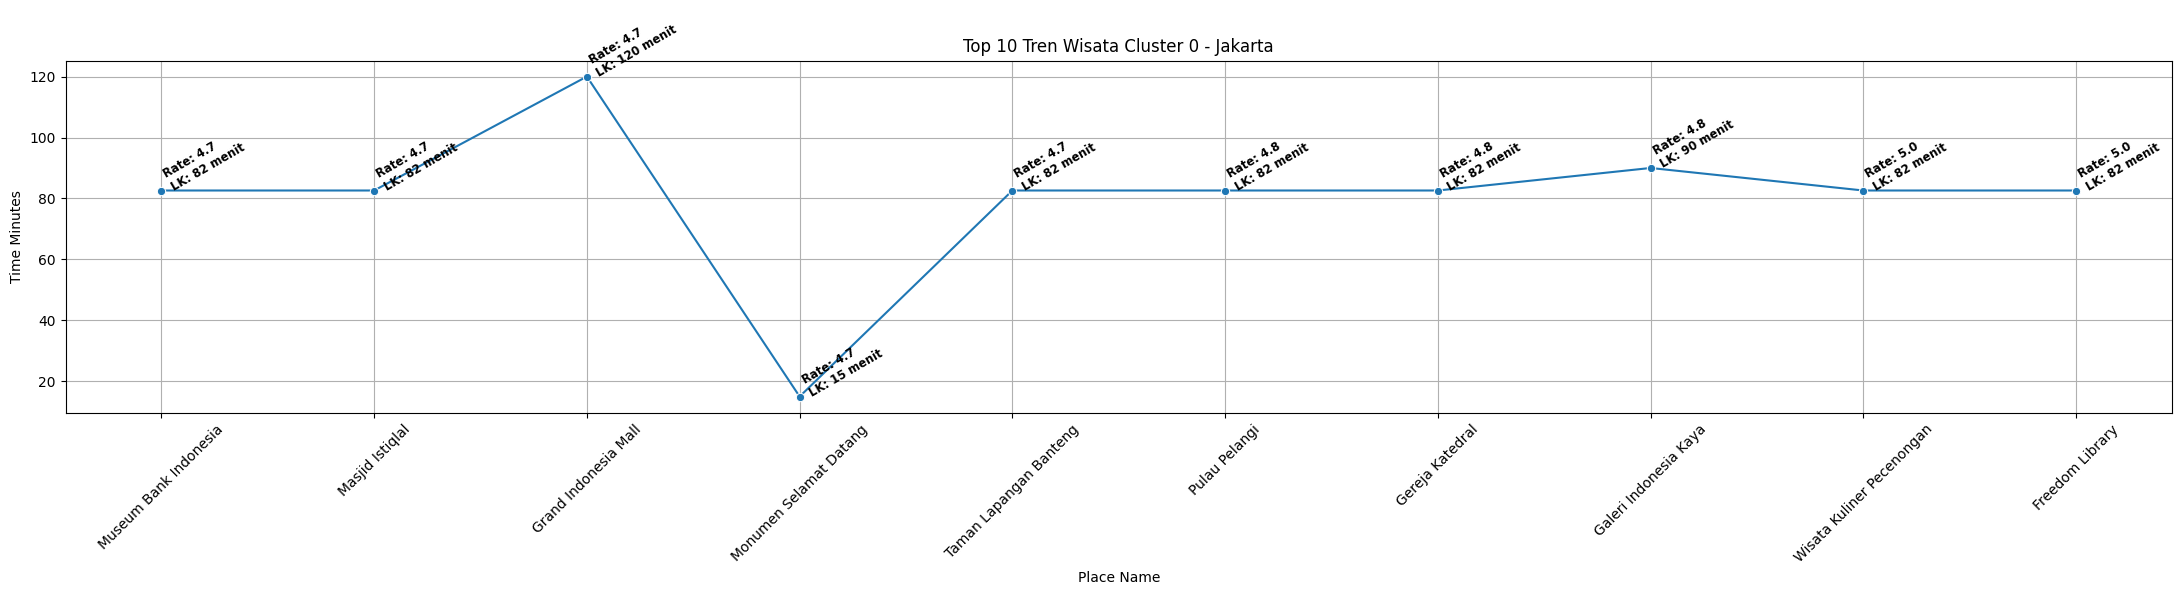

In [ ]:
# Visualisasikan dengan line chart analisis tren dari cluster0

# Mengambil top 10 berdasarkan rating
top_10_cluster0 = data_cluster0.nlargest(10, 'Rating').sort_values(by='Rating', ascending=True)

# Visualisasi dengan line chart untuk Rating
plt.figure(figsize=(22, 6))
sns.lineplot(x='Place_Name', y='Time_Minutes', data=top_10_cluster0, marker='o')
for i, row in top_10_cluster0.iterrows():
  plt.text(row['Place_Name'],row['Time_Minutes'],f"Rate: {row['Rating']}\nLK: {int(row['Time_Minutes'])} menit",
  horizontalalignment='left', size='small', color='black', weight='semibold', rotation=30)

cluster = data_cluster0['Cluster'].unique()[0]
city = data_cluster0['City'].unique()[0]
plt.title("Top 10 Tren Wisata "+ "Cluster " + str(cluster) + " - " +  city)
plt.xlabel('Place Name')
plt.ylabel('Time Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()

In [ ]:
# Cetak kesimpulan berdasarkan grafik
top_lk_place = data_cluster0.nlargest(1, 'Time_Minutes').iloc[0]
top_10 = ""
for i in top_10_cluster0['Place_Name']:
    top_10 += i + ", "
top_10 = top_10[:-2]
lowest_rated_place = data_cluster0.sort_values(by='Rating', ascending=False).iloc[-1]
cluster = data_cluster0['Cluster'].unique()[0]

print(f"**Kesimpulan Tren Cluster {cluster}:**")
print(f"- Berdasarkan grafik, dapat dilihat bahwa top 10  tempat wisata dengan rating tertinggi di cluster ini secara berurutan adalah {top_10}.")
print(f"- Pada top 10 rating tertinggi, rata-rata lama kunjungan tertinggi ada pada Grand Indonesia Mall dengan rata-rata lama kunjungan  sekitar 2 jam dan rata-rata lama kunjungan terendah ada pada Monumen Selamat Datang dengan lama kunjungan sekitar 15 menit.")
print(f"- Tempat wisata dengan lama kunjungan tertinggi di cluster ini adalah {top_lk_place['Place_Name']} dengan rating {top_lk_place['Rating']} dan lama kunjungan sekitar {int(top_lk_place['Time_Minutes'])} menit.")
print(f"- Tempat wisata dengan rating terendah di cluster ini adalah {lowest_rated_place['Place_Name']} dengan rating {lowest_rated_place['Rating']} dan lama kunjungan sekitar {int(lowest_rated_place['Time_Minutes'])} menit.")
print(f"- Secara keseluruhan, tren rating tempat wisata dalam Cluster 0 ini menunjukkan bahwa kualitas tempat wisata di Jakarta dalam cluster ini cukup tinggi dan stabil")

**Kesimpulan Tren Cluster 0:**
- Berdasarkan grafik, dapat dilihat bahwa top 10  tempat wisata dengan rating tertinggi di cluster ini secara berurutan adalah Museum Bank Indonesia, Masjid Istiqlal, Grand Indonesia Mall, Monumen Selamat Datang, Taman Lapangan Banteng, Pulau Pelangi, Gereja Katedral, Galeri Indonesia Kaya, Wisata Kuliner Pecenongan, Freedom Library.
- Pada top 10 rating tertinggi, rata-rata lama kunjungan tertinggi ada pada Grand Indonesia Mall dengan rata-rata lama kunjungan  sekitar 2 jam dan rata-rata lama kunjungan terendah ada pada Monumen Selamat Datang dengan lama kunjungan sekitar 15 menit.
- Tempat wisata dengan lama kunjungan tertinggi di cluster ini adalah Dunia Fantasi dengan rating 4.6 dan lama kunjungan sekitar 360 menit.
- Tempat wisata dengan rating terendah di cluster ini adalah Pulau Pari dengan rating 4.0 dan lama kunjungan sekitar 82 menit.
- Secara keseluruhan, tren rating tempat wisata dalam Cluster 0 ini menunjukkan bahwa kualitas tempat wisata di 

In [ ]:
top_10_cluster0 = data_cluster0.nlargest(10, 'Rating')
top_10_cluster0

,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
28,Wisata Kuliner Pecenongan,Pusat Perbelanjaan,Jakarta,0,5.0,82.609756,-6.166789,106.826526,0
68,Freedom Library,Budaya,Jakarta,0,5.0,82.609756,-6.202248,106.845197,0
13,Pulau Pelangi,Bahari,Jakarta,900000,4.8,82.609756,-5.587055,106.588500,0
22,Gereja Katedral,Tempat Ibadah,Jakarta,0,4.8,82.609756,-6.169225,106.833063,0
48,Galeri Indonesia Kaya,Budaya,Jakarta,0,4.8,90.000000,-6.194850,106.820061,0
17,Museum Bank Indonesia,Budaya,Jakarta,2000,4.7,82.609756,-6.137127,106.813005,0
21,Masjid Istiqlal,Tempat Ibadah,Jakarta,0,4.7,82.609756,-6.170170,106.831390,0
34,Grand Indonesia Mall,Pusat Perbelanjaan,Jakarta,0,4.7,120.000000,-6.195180,106.820441,0
43,Monumen Selamat Datang,Budaya,Jakarta,0,4.7,15.000000,-6.194998,106.823050,0
56,Taman Lapangan Banteng,Taman Hiburan,Jakarta,0,4.7,82.609756,-6.170555,106.835038,0


## Tren Cluster 1

In [ ]:
# Mengambil data cluster 1 saja dari data ke data_cluster1
data_cluster1 = data[data['Cluster'] == 1]
cluster = data_cluster1['Cluster'].unique()[0]
city = data_cluster1['City'].unique()[0]
print('Tren Cluster '+ str(cluster) + " - " +  city)
data_cluster1.head(10)

Tren Cluster 1 - Yogyakarta


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
84,Taman Pintar Yogyakarta,Taman Hiburan,Yogyakarta,6000,4.5,120.000000,-7.800671,110.367655,1
85,Keraton Yogyakarta,Budaya,Yogyakarta,15000,4.6,82.609756,-7.805284,110.364203,1
86,Sindu Kusuma Edupark (SKE),Taman Hiburan,Yogyakarta,20000,4.2,120.000000,-7.767297,110.354249,1
87,Museum Benteng Vredeburg Yogyakarta,Budaya,Yogyakarta,3000,4.6,120.000000,-7.800202,110.366304,1
88,De Mata Museum Jogja,Budaya,Yogyakarta,50000,4.4,82.609756,-7.816316,110.387144,1
89,Kampung Wisata Taman Sari,Taman Hiburan,Yogyakarta,5000,4.6,82.609756,-7.810067,110.359458,1
90,Situs Warungboto,Taman Hiburan,Yogyakarta,0,4.4,60.000000,-7.810269,110.393151,1
91,Nol Kilometer Jl.Malioboro,Taman Hiburan,Yogyakarta,0,4.7,45.000000,-7.801380,110.364765,1
92,Gembira Loka Zoo,Cagar Alam,Yogyakarta,60000,4.5,82.609756,-7.806234,110.396798,1
93,Sumur Gumuling,Taman Hiburan,Yogyakarta,7000,4.5,82.609756,-7.808791,110.359183,1


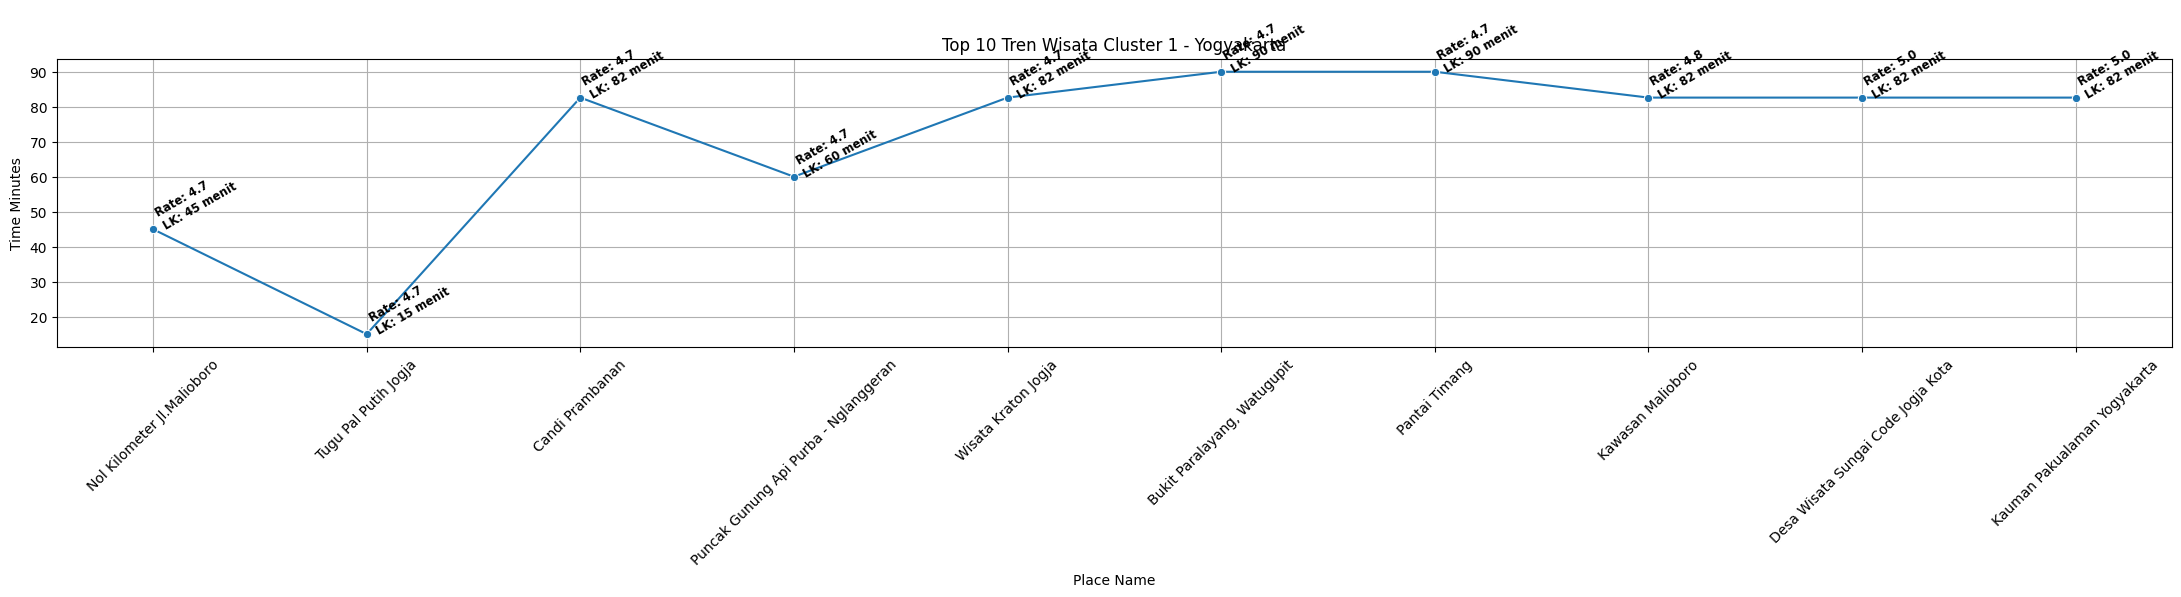

In [ ]:
# Visualisasikan dengan line chart analisis tren dari cluster1

# Mengambil top 10 berdasarkan rating
top_10_cluster1 = data_cluster1.nlargest(10, 'Rating').sort_values(by='Rating', ascending=True)

# Visualisasi dengan line chart untuk Rating
plt.figure(figsize=(22, 6))
sns.lineplot(x='Place_Name', y='Time_Minutes', data=top_10_cluster1, marker='o')
for i, row in top_10_cluster1.iterrows():
  plt.text(row['Place_Name'],row['Time_Minutes'],f"Rate: {row['Rating']}\nLK: {int(row['Time_Minutes'])} menit",
  horizontalalignment='left', size='small', color='black', weight='semibold', rotation=30)

cluster = data_cluster1['Cluster'].unique()[0]
city = data_cluster1['City'].unique()[0]
plt.title("Top 10 Tren Wisata "+ "Cluster " + str(cluster) + " - " +  city)
plt.xlabel('Place Name')
plt.ylabel('Time Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()

In [ ]:
# Cetak kesimpulan berdasarkan grafik
top_lk_place = data_cluster1.nlargest(1, 'Time_Minutes').iloc[0]
top_10 = ""
for i in top_10_cluster1['Place_Name']:
    top_10 += i + ", "
top_10 = top_10[:-2]
lowest_rated_place = data_cluster1.sort_values(by='Rating', ascending=False).iloc[-1]
cluster = data_cluster1['Cluster'].unique()[0]

print(f"**Kesimpulan Tren Cluster {cluster}:**")
print(f"- Berdasarkan grafik, dapat dilihat bahwa top 10  tempat wisata dengan rating tertinggi di cluster ini secara berurutan adalah {top_10}.")
print(f"- Pada top 10 rating tertinggi, rata-rata lama kunjungan tertinggi ada pada Bukit Paralayang - Watugupit dan Pantai Timang dengan rata-rata lama kunjungan  sekitar 90 menit dan rata-rata lama kunjungan terendah ada pada Tugu Pal Putih Jogja dengan lama kunjungan sekitar 15 menit.")
print(f"- Tempat wisata dengan lama kunjungan tertinggi di cluster ini adalah {top_lk_place['Place_Name']} dengan rating {top_lk_place['Rating']} dan lama kunjungan sekitar {int(top_lk_place['Time_Minutes'])} menit.")
print(f"- Tempat wisata dengan rating terendah di cluster ini adalah {lowest_rated_place['Place_Name']} dengan rating {lowest_rated_place['Rating']} dan lama kunjungan sekitar {int(lowest_rated_place['Time_Minutes'])} menit.")
print(f"- Dari grafik, tren menunjukkan bahwa meskipun ada beberapa tempat wisata dengan peringkat sempurna, sebagian besar tempat lain di Cluster 1 memiliki peringkat serupa dan sedikit lebih rendah, sehingga secara keseluruhan menunjukkan tren yang stabil.")

**Kesimpulan Tren Cluster 1:**
- Berdasarkan grafik, dapat dilihat bahwa top 10  tempat wisata dengan rating tertinggi di cluster ini secara berurutan adalah Nol Kilometer Jl.Malioboro, Tugu Pal Putih Jogja, Candi Prambanan, Puncak Gunung Api Purba - Nglanggeran, Wisata Kraton Jogja, Bukit Paralayang, Watugupit, Pantai Timang, Kawasan Malioboro, Desa Wisata Sungai Code Jogja Kota, Kauman Pakualaman Yogyakarta.
- Pada top 10 rating tertinggi, rata-rata lama kunjungan tertinggi ada pada Bukit Paralayang - Watugupit dan Pantai Timang dengan rata-rata lama kunjungan  sekitar 90 menit dan rata-rata lama kunjungan terendah ada pada Tugu Pal Putih Jogja dengan lama kunjungan sekitar 15 menit.
- Tempat wisata dengan lama kunjungan tertinggi di cluster ini adalah Taman Budaya Yogyakarta dengan rating 4.5 dan lama kunjungan sekitar 210 menit.
- Tempat wisata dengan rating terendah di cluster ini adalah Pantai Samas dengan rating 4.0 dan lama kunjungan sekitar 45 menit.
- Dari grafik, tren menunj

In [ ]:
top_10_cluster1 = data_cluster1.nlargest(10, 'Rating')
top_10_cluster1

,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
94,Desa Wisata Sungai Code Jogja Kota,Taman Hiburan,Yogyakarta,0,5.0,82.609756,-7.822909,110.375689,1
123,Kauman Pakualaman Yogyakarta,Budaya,Yogyakarta,0,5.0,82.609756,-7.801035,110.375192,1
105,Kawasan Malioboro,Taman Hiburan,Yogyakarta,0,4.8,82.609756,-7.793167,110.365524,1
91,Nol Kilometer Jl.Malioboro,Taman Hiburan,Yogyakarta,0,4.7,45.000000,-7.801380,110.364765,1
102,Tugu Pal Putih Jogja,Taman Hiburan,Yogyakarta,0,4.7,15.000000,-7.782944,110.367055,1
120,Candi Prambanan,Budaya,Yogyakarta,50000,4.7,82.609756,-7.752021,110.491467,1
138,Puncak Gunung Api Purba - Nglanggeran,Cagar Alam,Yogyakarta,10000,4.7,60.000000,-7.841253,110.543056,1
149,Wisata Kraton Jogja,Budaya,Yogyakarta,7000,4.7,82.609756,-7.806754,110.363666,1
160,"Bukit Paralayang, Watugupit",Cagar Alam,Yogyakarta,5000,4.7,90.000000,-8.026855,110.345912,1
167,Pantai Timang,Bahari,Yogyakarta,10000,4.7,90.000000,-8.175927,110.662420,1


## Tren Cluster 2

In [ ]:
# Mengambil data cluster 2 saja dari data ke data_cluster2
data_cluster2 = data[data['Cluster'] == 2]
cluster = data_cluster2['Cluster'].unique()[0]
city = data_cluster2['City'].unique()[0]
print('Tren Cluster '+ str(cluster) + " - " +  city)
data_cluster2.head(10)

Tren Cluster 2 - Bandung


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
210,GunungTangkuban perahu,Cagar Alam,Bandung,30000,4.5,82.609756,-6.759638,107.609781,2
211,Jalan Braga,Budaya,Bandung,0,4.7,82.609756,-6.915053,107.608984,2
212,Gedung Sate,Budaya,Bandung,5000,4.6,82.609756,-6.902481,107.618810,2
213,Trans Studio Bandung,Taman Hiburan,Bandung,280000,4.5,240.000000,-6.925094,107.636494,2
214,Taman Hutan Raya Ir. H. Djuanda,Cagar Alam,Bandung,15000,4.5,90.000000,-6.856579,107.632373,2
215,Farm House Susu Lembang,Taman Hiburan,Bandung,30000,4.4,82.609756,-6.832969,107.605618,2
216,Kebun Binatang Bandung,Cagar Alam,Bandung,20000,4.0,180.000000,-6.889718,107.607728,2
217,Kawah Putih,Cagar Alam,Bandung,81000,4.5,82.609756,-7.166204,107.402126,2
218,Tebing Karaton,Cagar Alam,Bandung,15000,4.5,82.609756,-6.834068,107.663615,2
219,Dusun Bambu,Taman Hiburan,Bandung,25000,4.5,82.609756,-6.789715,107.579163,2


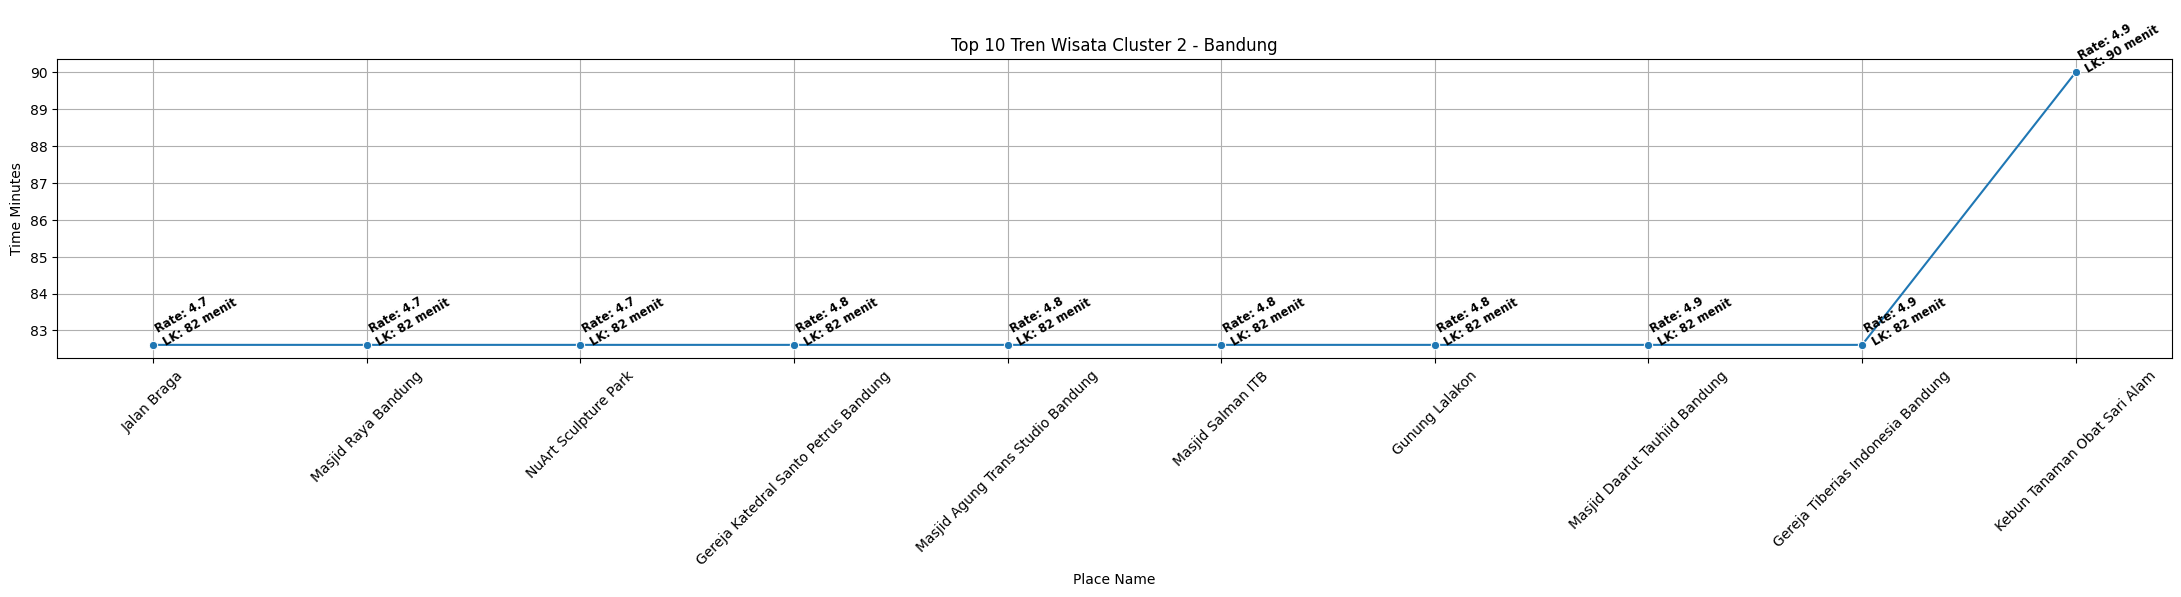

In [ ]:
# Visualisasikan dengan line chart analisis tren dari cluster2

# Mengambil top 10 berdasarkan rating
top_10_cluster2 = data_cluster2.nlargest(10, 'Rating').sort_values(by='Rating', ascending=True)

# Visualisasi dengan line chart untuk Rating
plt.figure(figsize=(22, 6))
sns.lineplot(x='Place_Name', y='Time_Minutes', data=top_10_cluster2, marker='o')
for i, row in top_10_cluster2.iterrows():
  plt.text(row['Place_Name'],row['Time_Minutes'],f"Rate: {row['Rating']}\nLK: {int(row['Time_Minutes'])} menit",
  horizontalalignment='left', size='small', color='black', weight='semibold', rotation=30)

cluster = data_cluster2['Cluster'].unique()[0]
city = data_cluster2['City'].unique()[0]
plt.title("Top 10 Tren Wisata "+ "Cluster " + str(cluster) + " - " +  city)
plt.xlabel('Place Name')
plt.ylabel('Time Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()

In [ ]:
# Cetak kesimpulan berdasarkan grafik
top_lk_place = data_cluster2.nlargest(1, 'Time_Minutes').iloc[0]
top_10 = ""
for i in top_10_cluster2['Place_Name']:
    top_10 += i + ", "
top_10 = top_10[:-2]
lowest_rated_place = data_cluster2.sort_values(by='Rating', ascending=False).iloc[-1]
cluster = data_cluster2['Cluster'].unique()[0]

print(f"**Kesimpulan Tren Cluster {cluster}:**")
print(f"- Berdasarkan grafik, dapat dilihat bahwa top 10  tempat wisata dengan rating tertinggi di cluster ini secara berurutan adalah {top_10}.")
print(f"- Pada top 10 rating tertinggi, rata-rata lama kunjungan tertinggi ada pada Kebun Tanaman Obat Sari Alam dengan rata-rata lama kunjungan sekitar 90 menit dan untuk sisanya sekitar 82 menit.")
print(f"- Tempat wisata dengan lama kunjungan tertinggi di cluster ini adalah {top_lk_place['Place_Name']} dengan rating {top_lk_place['Rating']} dan lama kunjungan sekitar {int(top_lk_place['Time_Minutes'])} menit.")
print(f"- Tempat wisata dengan rating terendah di cluster ini adalah {lowest_rated_place['Place_Name']} dengan rating {lowest_rated_place['Rating']} dan lama kunjungan sekitar {int(lowest_rated_place['Time_Minutes'])} menit.")
print(f"- Dari grafik, trennya menunjukkan bahwa meskipun ada beberapa tempat wisata dengan rating tinggi, ratingnya cenderung turun secara bertahap namun tetap relatif stabil pada pertengahan 4,80an sebelum menurun lagi menjelang akhir.")

**Kesimpulan Tren Cluster 2:**
- Berdasarkan grafik, dapat dilihat bahwa top 10  tempat wisata dengan rating tertinggi di cluster ini secara berurutan adalah Jalan Braga, Masjid Raya Bandung, NuArt Sculpture Park, Gereja Katedral Santo Petrus Bandung, Masjid Agung Trans Studio Bandung, Masjid Salman ITB, Gunung Lalakon, Masjid Daarut Tauhiid Bandung, Gereja Tiberias Indonesia Bandung, Kebun Tanaman Obat Sari Alam.
- Pada top 10 rating tertinggi, rata-rata lama kunjungan tertinggi ada pada Kebun Tanaman Obat Sari Alam dengan rata-rata lama kunjungan sekitar 90 menit dan untuk sisanya sekitar 82 menit.
- Tempat wisata dengan lama kunjungan tertinggi di cluster ini adalah Trans Studio Bandung dengan rating 4.5 dan lama kunjungan sekitar 240 menit.
- Tempat wisata dengan rating terendah di cluster ini adalah Tektona Waterpark dengan rating 3.8 dan lama kunjungan sekitar 82 menit.
- Dari grafik, trennya menunjukkan bahwa meskipun ada beberapa tempat wisata dengan rating tinggi, ratingnya ce

In [ ]:
top_10_cluster2 = data_cluster2.nlargest(10, 'Rating')
top_10_cluster2

,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
277,Masjid Daarut Tauhiid Bandung,Tempat Ibadah,Bandung,0,4.9,82.609756,-6.863527,107.589919,2
279,Gereja Tiberias Indonesia Bandung,Tempat Ibadah,Bandung,0,4.9,82.609756,-6.934770,107.625351,2
322,Kebun Tanaman Obat Sari Alam,Cagar Alam,Bandung,0,4.9,90.000000,-6.907929,107.594165,2
263,Gereja Katedral Santo Petrus Bandung,Tempat Ibadah,Bandung,0,4.8,82.609756,-6.914839,107.610551,2
278,Masjid Agung Trans Studio Bandung,Tempat Ibadah,Bandung,0,4.8,82.609756,-6.925963,107.635428,2
287,Masjid Salman ITB,Tempat Ibadah,Bandung,0,4.8,82.609756,-6.893664,107.611271,2
297,Gunung Lalakon,Cagar Alam,Bandung,0,4.8,82.609756,-6.958056,107.520556,2
211,Jalan Braga,Budaya,Bandung,0,4.7,82.609756,-6.915053,107.608984,2
222,Masjid Raya Bandung,Tempat Ibadah,Bandung,0,4.7,82.609756,-6.921690,107.606140,2
247,NuArt Sculpture Park,Taman Hiburan,Bandung,50000,4.7,82.609756,-6.877859,107.572026,2


## Tren Cluster 3

In [ ]:
# Mengambil data cluster 3 saja dari data ke data_cluster3
data_cluster3 = data[data['Cluster'] == 3]
cluster = data_cluster3['Cluster'].unique()[0]
city = data_cluster3['City'].unique()[0]
print('Tren Cluster '+ str(cluster) + " - " +  city)
data_cluster3.head(10)

Tren Cluster 3 - Semarang


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
334,Candi Gedong Songo,Budaya,Semarang,10000,4.5,82.609756,-7.209887,110.342112,3
335,Grand Maerakaca,Taman Hiburan,Semarang,15000,4.4,82.609756,-6.960522,110.386394,3
336,Kampung Pelangi,Taman Hiburan,Semarang,3000,4.3,30.000000,-6.988881,110.408378,3
337,Lawang Sewu,Budaya,Semarang,10000,4.6,82.609756,-6.983910,110.410434,3
338,Sam Poo Kong Temple,Budaya,Semarang,35000,4.5,82.609756,-6.996237,110.398122,3
339,Desa Wisata Lembah Kalipancur,Taman Hiburan,Semarang,0,3.9,90.000000,-7.020524,110.375461,3
340,Hutan Wisata Tinjomoyo Semarang,Cagar Alam,Semarang,3000,4.3,82.609756,-7.029684,110.399961,3
341,Taman Kasmaran,Taman Hiburan,Semarang,3000,4.5,90.000000,-6.990940,110.406593,3
342,Pantai Baruna,Bahari,Semarang,3000,4.0,82.609756,-6.945105,110.398240,3
343,Pantai Marina,Bahari,Semarang,3000,4.1,82.609756,-6.948877,110.389329,3


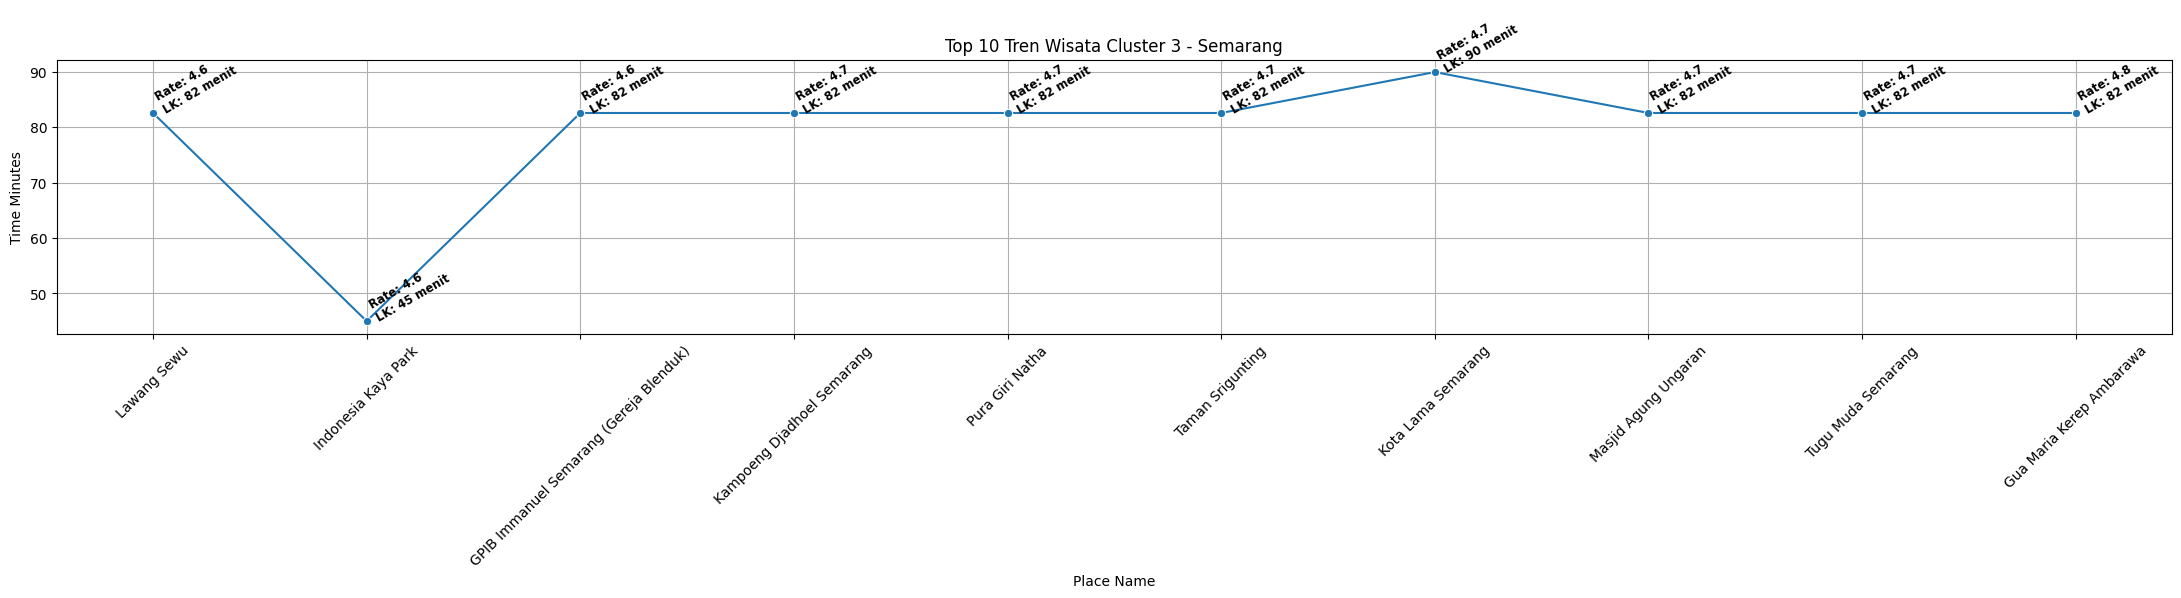

In [ ]:
# Visualisasikan dengan line chart analisis tren dari cluster3

# Mengambil top 10 berdasarkan rating
top_10_cluster3 = data_cluster3.nlargest(10, 'Rating').sort_values(by='Rating', ascending=True)

# Visualisasi dengan line chart untuk Rating
plt.figure(figsize=(22, 6))
sns.lineplot(x='Place_Name', y='Time_Minutes', data=top_10_cluster3, marker='o')
for i, row in top_10_cluster3.iterrows():
  plt.text(row['Place_Name'],row['Time_Minutes'],f"Rate: {row['Rating']}\nLK: {int(row['Time_Minutes'])} menit",
  horizontalalignment='left', size='small', color='black', weight='semibold', rotation=30)

cluster = data_cluster3['Cluster'].unique()[0]
city = data_cluster3['City'].unique()[0]
plt.title("Top 10 Tren Wisata "+ "Cluster " + str(cluster) + " - " +  city)
plt.xlabel('Place Name')
plt.ylabel('Time Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()

In [ ]:
# Cetak kesimpulan berdasarkan grafik
top_lk_place = data_cluster3.nlargest(1, 'Time_Minutes').iloc[0]
top_10 = ""
for i in top_10_cluster3['Place_Name']:
    top_10 += i + ", "
top_10 = top_10[:-2]
lowest_rated_place = data_cluster3.sort_values(by='Rating', ascending=False).iloc[-1]
cluster = data_cluster3['Cluster'].unique()[0]

print(f"**Kesimpulan Tren Cluster {cluster}:**")
print(f"- Berdasarkan grafik, dapat dilihat bahwa top 10  tempat wisata dengan rating tertinggi di cluster ini secara berurutan adalah {top_10}.")
print(f"- Pada top 10 rating tertinggi, rata-rata lama kunjungan tertinggi ada pada Kota Lama Semarang dengan rata-rata lama kunjungan  sekitar 90 menit dan rata-rata lama kunjungan terendah ada pada Indonesia Kaya Park dengan lama kunjungan sekitar 45 menit.")
print(f"- Tempat wisata dengan lama kunjungan tertinggi di cluster ini adalah {top_lk_place['Place_Name']} dengan rating {top_lk_place['Rating']} dan lama kunjungan sekitar {int(top_lk_place['Time_Minutes'])} menit.")
print(f"- Tempat wisata dengan rating terendah di cluster ini adalah {lowest_rated_place['Place_Name']} dengan rating {lowest_rated_place['Rating']} dan lama kunjungan sekitar {int(lowest_rated_place['Time_Minutes'])} menit.")
print(f"- Dari grafik, tren menunjukkan bahwa meskipun tempat dengan rating tertinggi memiliki rating yang jauh lebih tinggi, rating tersebut cenderung stabil untuk sebagian besar tempat pada pertengahan 4,70an sebelum menurun lagi menjelang akhir.")

**Kesimpulan Tren Cluster 3:**
- Berdasarkan grafik, dapat dilihat bahwa top 10  tempat wisata dengan rating tertinggi di cluster ini secara berurutan adalah Lawang Sewu, Indonesia Kaya Park, GPIB Immanuel Semarang (Gereja Blenduk), Kampoeng Djadhoel Semarang, Pura Giri Natha, Taman Srigunting, Kota Lama Semarang, Masjid Agung Ungaran, Tugu Muda Semarang, Gua Maria Kerep Ambarawa.
- Pada top 10 rating tertinggi, rata-rata lama kunjungan tertinggi ada pada Kota Lama Semarang dengan rata-rata lama kunjungan  sekitar 90 menit dan rata-rata lama kunjungan terendah ada pada Indonesia Kaya Park dengan lama kunjungan sekitar 45 menit.
- Tempat wisata dengan lama kunjungan tertinggi di cluster ini adalah Saloka Theme Park dengan rating 4.4 dan lama kunjungan sekitar 180 menit.
- Tempat wisata dengan rating terendah di cluster ini adalah Pantai Maron dengan rating 3.4 dan lama kunjungan sekitar 82 menit.
- Dari grafik, tren menunjukkan bahwa meskipun tempat dengan rating tertinggi memiliki rati

In [ ]:
top_10_cluster3 = data_cluster3.nlargest(10, 'Rating')
top_10_cluster3

,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
371,Gua Maria Kerep Ambarawa,Cagar Alam,Semarang,2000,4.8,82.609756,-7.255236,110.399190,3
344,Kampoeng Djadhoel Semarang,Budaya,Semarang,10000,4.7,82.609756,-6.968773,110.431950,3
347,Pura Giri Natha,Budaya,Semarang,20000,4.7,82.609756,-6.998476,110.410647,3
352,Taman Srigunting,Taman Hiburan,Semarang,0,4.7,82.609756,-6.968173,110.427826,3
374,Kota Lama Semarang,Budaya,Semarang,0,4.7,90.000000,-6.968140,110.427861,3
379,Masjid Agung Ungaran,Tempat Ibadah,Semarang,0,4.7,82.609756,-7.135071,110.408813,3
380,Tugu Muda Semarang,Budaya,Semarang,0,4.7,82.609756,-6.984349,110.409321,3
337,Lawang Sewu,Budaya,Semarang,10000,4.6,82.609756,-6.983910,110.410434,3
345,Indonesia Kaya Park,Taman Hiburan,Semarang,0,4.6,45.000000,-6.992351,110.420116,3
351,GPIB Immanuel Semarang (Gereja Blenduk),Tempat Ibadah,Semarang,0,4.6,82.609756,-6.968349,110.427477,3


## Tren Cluster 4

In [ ]:
# Mengambil data cluster 4 saja dari data ke data_cluster4
data_cluster4 = data[data['Cluster'] == 4]
cluster = data_cluster4['Cluster'].unique()[0]
city = data_cluster4['City'].unique()[0]
print('Tren Cluster '+ str(cluster) + " - " +  city)
data_cluster4.head(10)

Tren Cluster 4 - Surabaya


,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
391,Ekowisata Mangrove Wonorejo,Cagar Alam,Surabaya,0,4.3,60.000000,-7.308648,112.821662,4
392,Taman Harmoni Keputih,Cagar Alam,Surabaya,0,4.4,60.000000,-7.295221,112.803560,4
393,Air Mancur Menari,Taman Hiburan,Surabaya,35000,4.4,45.000000,-7.235693,112.795523,4
394,Taman Prestasi,Taman Hiburan,Surabaya,0,4.6,82.609756,-7.261472,112.742828,4
395,Monumen Kapal Selam,Budaya,Surabaya,15000,4.4,30.000000,-7.265430,112.750305,4
396,Taman Kunang-Kunang,Taman Hiburan,Surabaya,0,4.4,45.000000,-7.318220,112.784240,4
397,Taman Buah Surabaya,Taman Hiburan,Surabaya,0,4.1,30.000000,-7.266214,112.795281,4
398,Taman Pelangi,Taman Hiburan,Surabaya,0,4.5,20.000000,-7.327560,112.731224,4
399,Hutan Bambu Keputih,Cagar Alam,Surabaya,0,4.3,25.000000,-7.294191,112.801724,4
400,Taman Keputran,Taman Hiburan,Surabaya,0,4.3,82.609756,-7.273215,112.744102,4


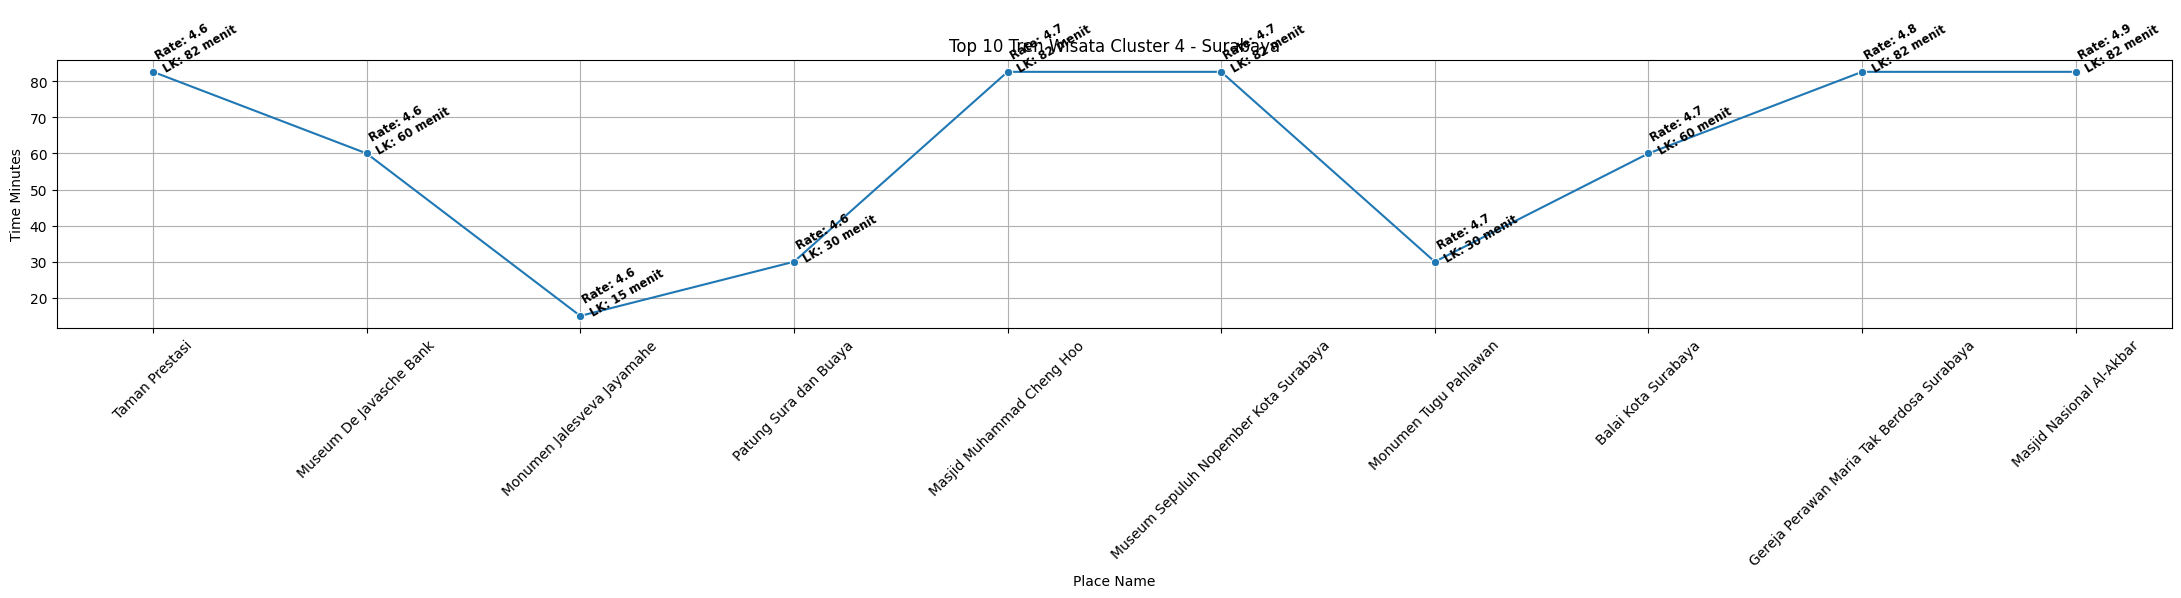

In [ ]:
# Visualisasikan dengan line chart analisis tren dari cluster4

# Mengambil top 10 berdasarkan rating
top_10_cluster4 = data_cluster4.nlargest(10, 'Rating').sort_values(by='Rating', ascending=True)

# Visualisasi dengan line chart untuk Rating
plt.figure(figsize=(22, 6))
sns.lineplot(x='Place_Name', y='Time_Minutes', data=top_10_cluster4, marker='o')
for i, row in top_10_cluster4.iterrows():
  plt.text(row['Place_Name'],row['Time_Minutes'],f"Rate: {row['Rating']}\nLK: {int(row['Time_Minutes'])} menit",
  horizontalalignment='left', size='small', color='black', weight='semibold', rotation=30)

cluster = data_cluster4['Cluster'].unique()[0]
city = data_cluster4['City'].unique()[0]
plt.title("Top 10 Tren Wisata "+ "Cluster " + str(cluster) + " - " +  city)
plt.xlabel('Place Name')
plt.ylabel('Time Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()

In [ ]:
# Cetak kesimpulan berdasarkan grafik
top_lk_place = data_cluster4.nlargest(1, 'Time_Minutes').iloc[0]
top_10 = ""
for i in top_10_cluster4['Place_Name']:
    top_10 += i + ", "
top_10 = top_10[:-2]
lowest_rated_place = data_cluster4.sort_values(by='Rating', ascending=False).iloc[-1]
cluster = data_cluster4['Cluster'].unique()[0]

print(f"**Kesimpulan Tren Cluster {cluster}:**")
print(f"- Berdasarkan grafik, dapat dilihat bahwa top 10  tempat wisata dengan rating tertinggi di cluster ini secara berurutan adalah {top_10}.")
print(f"- Pada top 10 rating tertinggi, terdapat 4 lokasi dengan rata-rata lama kunjungan tertinggi yaitu sekitar 82 menit dan rata-rata lama kunjungan terendah ada pada Monumen Jalesveva Jayamahe dengan lama kunjungan sekitar 15 menit.")
print(f"- Tempat wisata dengan lama kunjungan tertinggi di cluster ini adalah {top_lk_place['Place_Name']} dengan rating {top_lk_place['Rating']} dan lama kunjungan sekitar {int(top_lk_place['Time_Minutes'])} menit.")
print(f"- Tempat wisata dengan rating terendah di cluster ini adalah {lowest_rated_place['Place_Name']} dengan rating {lowest_rated_place['Rating']} dan lama kunjungan sekitar {int(lowest_rated_place['Time_Minutes'])} menit.")
print(f"- Secara keseluruhan, tren rating tempat wisata dalam Cluster 4 ini menunjukkan bahwa kualitas tempat wisata di Surabaya dalam klaster ini cukup tinggi dan stabil")

**Kesimpulan Tren Cluster 4:**
- Berdasarkan grafik, dapat dilihat bahwa top 10  tempat wisata dengan rating tertinggi di cluster ini secara berurutan adalah Taman Prestasi, Museum De Javasche Bank, Monumen Jalesveva Jayamahe, Patung Sura dan Buaya, Masjid Muhammad Cheng Hoo, Museum Sepuluh Nopember Kota Surabaya, Monumen Tugu Pahlawan, Balai Kota Surabaya, Gereja Perawan Maria Tak Berdosa Surabaya, Masjid Nasional Al-Akbar.
- Pada top 10 rating tertinggi, terdapat 4 lokasi dengan rata-rata lama kunjungan tertinggi yaitu sekitar 82 menit dan rata-rata lama kunjungan terendah ada pada Monumen Jalesveva Jayamahe dengan lama kunjungan sekitar 15 menit.
- Tempat wisata dengan lama kunjungan tertinggi di cluster ini adalah Kebun Binatang Surabaya dengan rating 4.3 dan lama kunjungan sekitar 180 menit.
- Tempat wisata dengan rating terendah di cluster ini adalah Taman Buah Surabaya dengan rating 4.1 dan lama kunjungan sekitar 30 menit.
- Secara keseluruhan, tren rating tempat wisata dalam Cl

In [ ]:
top_10_cluster4 = data_cluster4.nlargest(10, 'Rating')
top_10_cluster4

,Place_Name,Category,City,Price,Rating,Time_Minutes,Lat,Long,Cluster
411,Masjid Nasional Al-Akbar,Tempat Ibadah,Surabaya,0,4.9,82.609756,-7.336614,112.715181,4
436,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Surabaya,10000,4.8,82.609756,-7.242076,112.736816,4
410,Masjid Muhammad Cheng Hoo,Tempat Ibadah,Surabaya,0,4.7,82.609756,-7.252275,112.746880,4
417,Museum Sepuluh Nopember Kota Surabaya,Budaya,Surabaya,5000,4.7,82.609756,-7.245437,112.737899,4
418,Monumen Tugu Pahlawan,Budaya,Surabaya,0,4.7,30.000000,-7.246926,112.737810,4
425,Balai Kota Surabaya,Budaya,Surabaya,0,4.7,60.000000,-7.259295,112.747051,4
394,Taman Prestasi,Taman Hiburan,Surabaya,0,4.6,82.609756,-7.261472,112.742828,4
414,Museum De Javasche Bank,Budaya,Surabaya,5000,4.6,60.000000,-7.235394,112.736765,4
421,Monumen Jalesveva Jayamahe,Budaya,Surabaya,0,4.6,15.000000,-7.195475,112.739521,4
422,Patung Sura dan Buaya,Budaya,Surabaya,0,4.6,30.000000,-7.296049,112.738701,4
